In this notebook, we test the performance of our best models with an enhanced data set. Therefore, we extracted the same features for RAVDESS and IEMOCAP as for EmoDB. We will look at the performance of the models with the same chosen features separately on the new data set and as a combined approach. Moreover, we will perform another feature selection with Featurewiz on each newly created data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

# packages for models
import sklearn
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# dimensionality reduction
from featurewiz import featurewiz

# import own functions
from ipynb.fs.full.Functions import load_train_test_data, model_eval, run_gridsearchCV, load_model, feature_importance

pd.set_option('display.max_columns', None)
np.random.seed(0)

import warnings
warnings.filterwarnings('ignore')

Imported 0.2.8 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



In [2]:
def missing_cols(features1, features2):
    """
    Function checks whether there are missing features in one of the given feature sets.
    """
    missing_1 = list(set(features2) - set(features1))
    missing_2 = list(set(features1) - set(features2))
    return missing_1 + missing_2

# 1) RAVDESS only
## a) Ravdess with most important features from featurewiz 97

In [3]:
# get most important features (featurewiz 97)
df = pd.read_pickle('../results/df_prep_most_important97.pkl')
feat_most_imp97 = df.columns.to_list()

# load data
df_ravdess = pd.read_pickle('../results/df_prep_numerical_only_all_stats_ravdess.pkl')

# check if there are any features in the saved set of most important features from emodb
mis_cols = list(set(feat_most_imp97) - set(df_ravdess.columns.to_list()))
print(f'{mis_cols} are missing in the Ravdess feature set and are removed from the list.')
for feat in mis_cols:
    feat_most_imp97.remove(feat) 

# select features
df_ravdess_most_imp97 = df_ravdess[feat_most_imp97]

# load train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df_ravdess_most_imp97, test_size=0.3)

['f0_avg_change_rate_median'] are missing in the Ravdess feature set and are removed from the list.
A snippet of the data:


rms_min  mfccs5_mean   zcr_max  duration_rising_pitch_max  \
9   -0.420166     0.153849 -0.647578                   0.158822   
570 -0.287216     0.682831  1.195924                  -0.405119   
605 -0.420166    -1.483293 -0.214193                  -0.066754   
891 -0.269415    -0.049600 -1.087431                  -0.517907   
506 -0.369915     0.637284  0.646108                  -1.081849   

     lpccs_local4_min  lfccs9_max       min  energy_median  lfccs0_median  \
9            0.030787    0.256579  0.273609      -0.291271      -0.178899   
570          0.030787    1.264469  0.731975      -0.320252      -1.481432   
605          0.030787   -0.119943 -1.450705      -0.307094       1.748316   
891          0.030787   -0.521108 -0.405330      -0.324794       0.730244   
506          0.030787   -1.037276  0.612296      -0.249701      -0.591614   

     lpccs_global_median  lpc_global_mean  value_falling_energy_max  \
9              -0.481830        -0.837702                  0.101324   
570            -0.553829         0.050570                  0.086708   
605             1.192733         0.898441                  0.094994   
891             0.379350        -1.057679                  0.094875   
506            -0.199777        -0.639638                  0.092281   

     mfccs11_mean    f1_min  lpc_local3_var  lpccs_local0_var  lfccs9_median  \
9       -1.520579 -1.182574       -0.043204          0.010797      -0.305534   
570      0.870001 -1.279738       -0.043408         -0.816758       1.114897   
605     -0.028626  2.036971       -0.043258          0.834181      -1.272509   
891      0.069364 -0.194516       -0.043330          0.284539      -1.272506   
506     -0.116351 -0.282349       -0.043222         -0.503904       0.733801   

     delta_mfccs0_min  value_falling_pitch_iqr  lpc_local1_mean  \
9            0.653929                -0.295491        -0.201473   
570         -0.712724                -0.559407         0.898442   
605         -0.238524                 2.316268        -0.115204   
891          0.823799                 0.944343        -0.416164   
506          0.527495                -0.297571         0.176213   

     f1_avg_change_rate_var  threshold_entropy_var  mfccs3_max   f2_mean  \
9                 -0.477928              -0.602286   -0.761533 -0.565927   
570               -0.179753               0.575176    0.226611 -1.887476   
605               -0.608444              -0.808086   -1.874285  1.958339   
891               -0.020599               0.786339    0.959212 -0.680259   
506               -0.666570               0.883142    0.222437  0.235269   

     lfccs7_var  lfccs9_var  delta_mfccs5_median  mfccs4_max  energy_var  \
9     -0.163687    0.230889             0.098270   -0.585143   -0.946607   
570   -1.045615    1.614128             3.068837    0.370926   -0.518895   
605    1.335342    0.175781             0.098270   -0.567311    0.023286   
891   -0.091586   -0.000677             0.098270    0.743972   -0.657428   
506   -0.515107   -1.199263             0.098270    0.324526    0.825068   

     delta2_mfccs3_min  lpccs_local5_mean  shannon_entropy_mean  \
9             0.631590          -0.030787              0.090543   
570           1.289229          -0.030787             -1.065104   
605           0.491540          -0.030787              0.340607   
891           0.625837          -0.030787              0.479245   
506           0.708738          -0.030787             -0.133645   

     delta2_mfccs5_mean  delta_mfccs4_median   f3_mean  mfccs5_var  \
9              0.043616            -0.187405 -0.494511    0.705769   
570           -0.723085             1.616394 -2.509165    0.319419   
605            0.036443            -0.187405  1.402143   -1.204541   
891            0.036442            -0.187405  0.164084   -0.210955   
506            0.102885            -0.187405 -0.037485    0.044246   

     voiced_var  duration_rising_energy_var  lpc_local4_median    f0_var  \
9      0.073286

There are 739 entries with 96 columns in the training data.
There are 317 entries with 96 columns in the testing data.


### SVM


Evaluation: f1_score
100.00% for the train data
68.51% for the test data

Evaluation: accuracy_score
100.00% for the train data
69.09% for the test data

Evaluation: precision_score
100.00% for the train data
69.33% for the test data

Evaluation: recall_score
100.00% for the train data
68.27% for the test data

Evaluation: confusion_matrix of test predictions


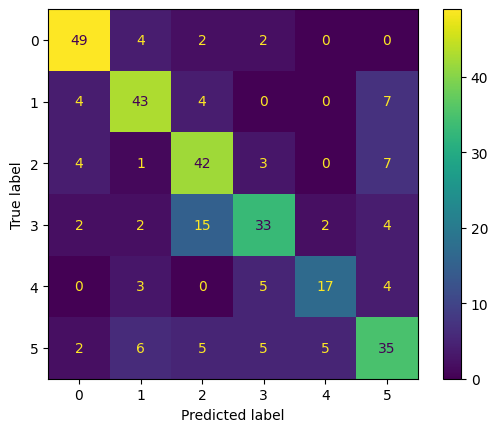


Hard cases for the model:

Label: fear(2)
Hard cases of false positives: ['happiness(3)']

Label: happiness(3)
Hard cases of false negatives: ['fear(2)']

Label: neutral(4)
Hard cases of false positives: ['sadness(5)']



In [4]:
svm_best_model = load_model('SVC', 'f1_macro', name_spec='final')
svm_ravdess = SVC().set_params(**svm_best_model.get_params())
svm_ravdess.fit(X_train, y_train)
model_eval(svm_ravdess, X_train, X_test, y_train, y_test, confusion=True, emotions='ravdess')

### Random Forest


Evaluation: f1_score
100.00% for the train data
58.04% for the test data

Evaluation: accuracy_score
100.00% for the train data
58.68% for the test data

Evaluation: precision_score
100.00% for the train data
58.06% for the test data

Evaluation: recall_score
100.00% for the train data
58.69% for the test data

Evaluation: confusion_matrix of test predictions


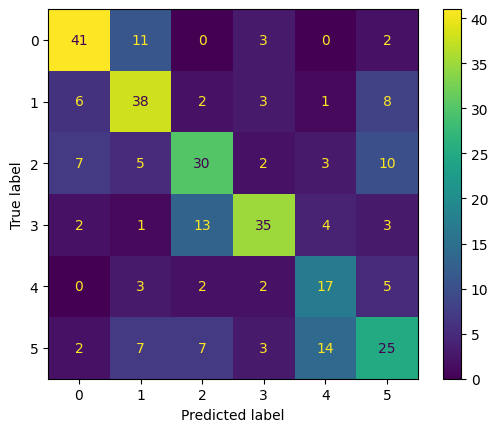


Hard cases for the model:

Label: fear(2)
Hard cases of false positives: ['happiness(3)']

Label: happiness(3)
Hard cases of false negatives: ['fear(2)']

Label: neutral(4)
Hard cases of false positives: ['sadness(5)']

Label: sadness(5)
Hard cases of false negatives: ['neutral(4)']



In [5]:
rfc_best_model = load_model('RandomForestClassifier', 'f1_macro', name_spec='final')
rfc_ravdess = RandomForestClassifier().set_params(**rfc_best_model.get_params())
rfc_ravdess.fit(X_train, y_train)
model_eval(rfc_ravdess, X_train, X_test, y_train, y_test, confusion=True, emotions='ravdess')

### XGB


Evaluation: f1_score
100.00% for the train data
64.12% for the test data

Evaluation: accuracy_score
100.00% for the train data
64.98% for the test data

Evaluation: precision_score
100.00% for the train data
64.74% for the test data

Evaluation: recall_score
100.00% for the train data
63.92% for the test data

Evaluation: confusion_matrix of test predictions


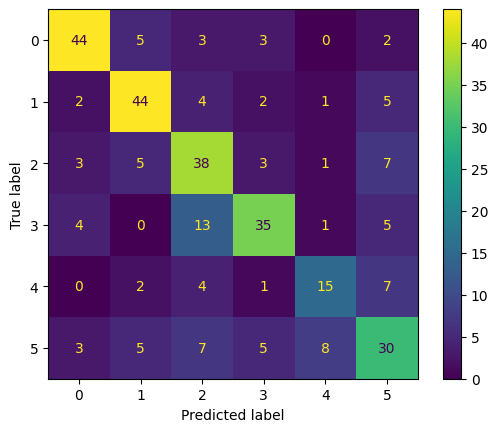


Hard cases for the model:

Label: happiness(3)
Hard cases of false negatives: ['fear(2)']

Label: neutral(4)
Hard cases of false negatives: ['sadness(5)']
Hard cases of false positives: ['sadness(5)']



In [6]:
xgb_best_model = load_model('XGBClassifier', 'f1_macro', name_spec='final')
xgb_ravdess = XGBClassifier().set_params(**xgb_best_model.get_params())
xgb_ravdess.fit(X_train, y_train)
model_eval(xgb_ravdess, X_train, X_test, y_train, y_test, confusion=True, emotions='ravdess')

## b) RAVDESS own feature selection

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.9 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (1056, 578)
#### Single_Label Multi_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#############################################

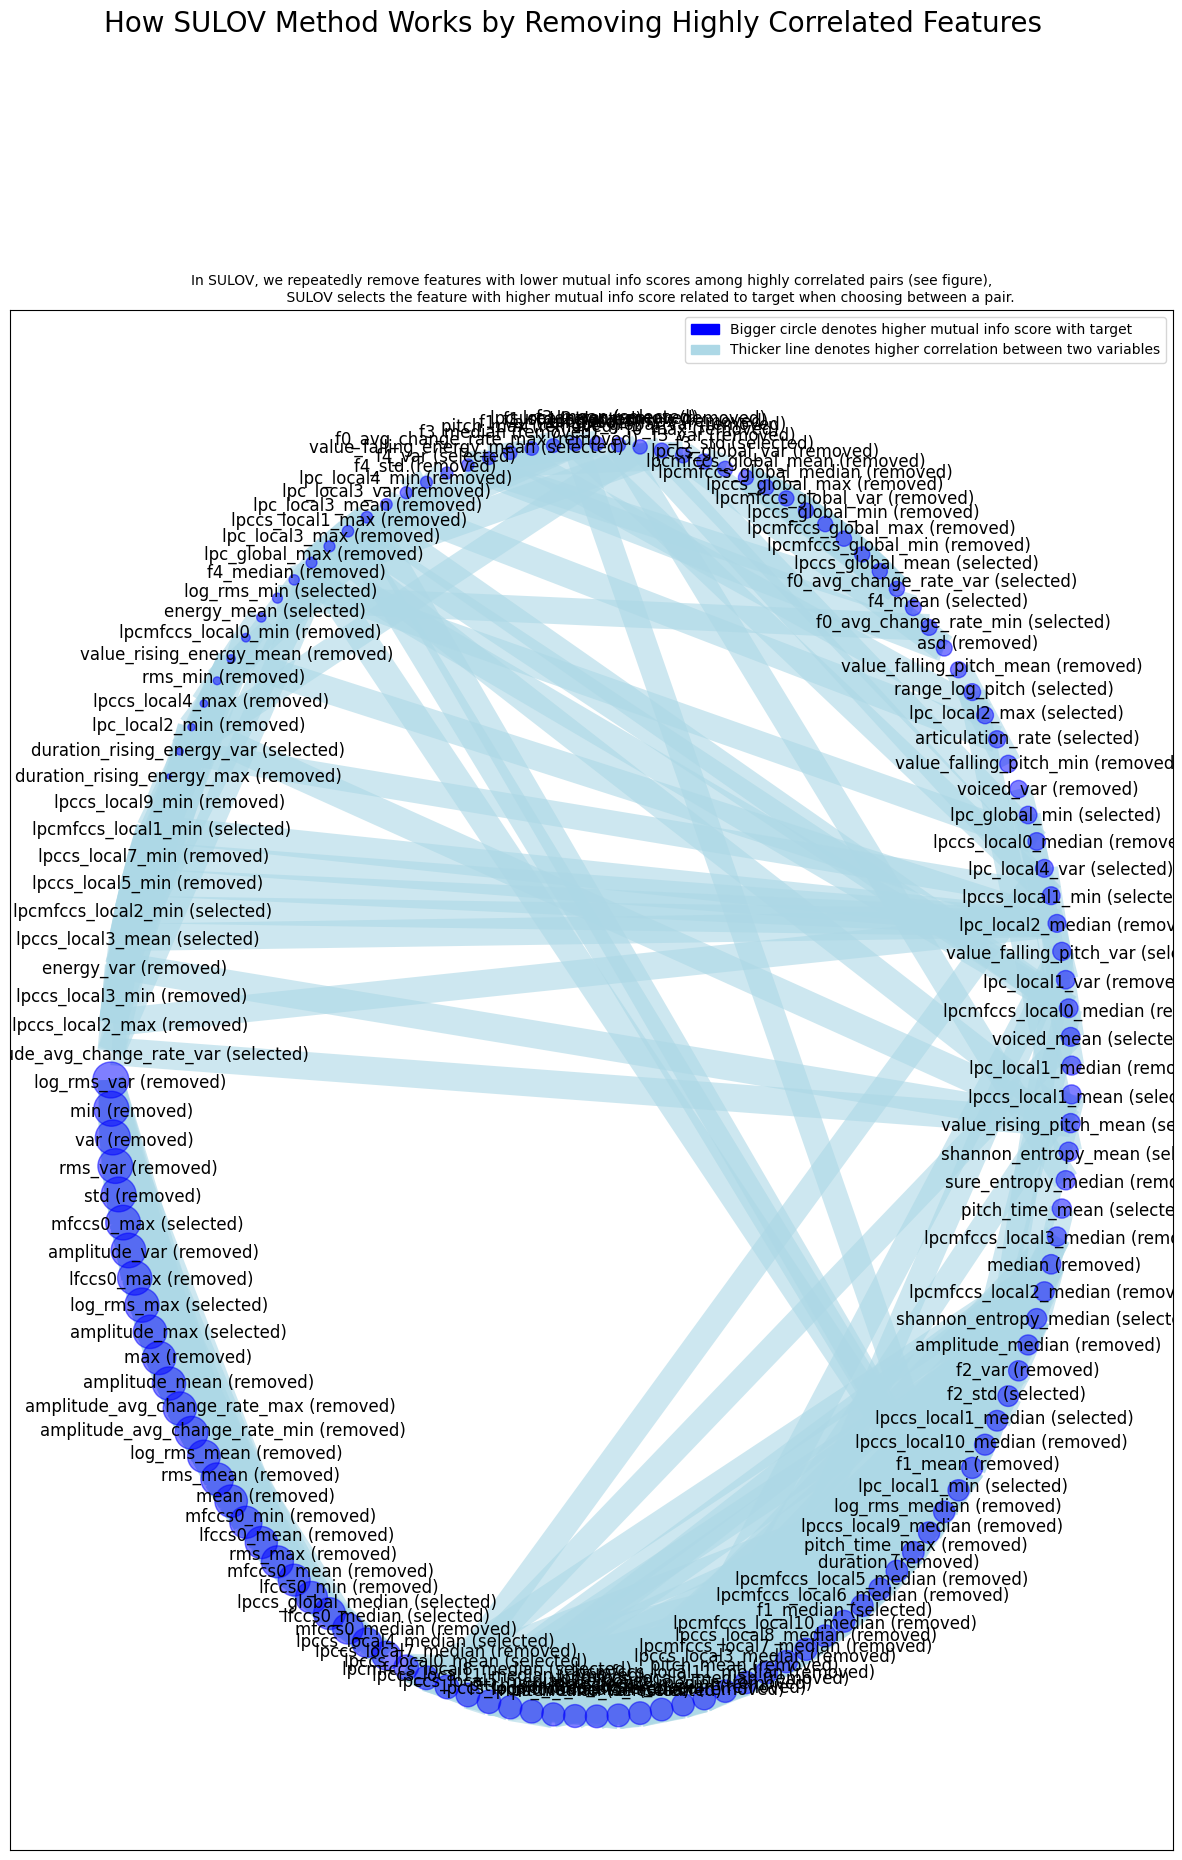

Time taken for SULOV method = 4 seconds
    Adding 0 categorical variables to reduced numeric variables  of 482
Finally 482 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 482 
    Taking top 86 features per iteration...
    XGBoost version using 1.7.5 as tree method: hist
Number of booster rounds = 100
        using 482 variables...
            selecting 90 features in this iteration
            Time taken for regular XGBoost feature selection = 7 seconds
        using 386 variables...
            selecting 69 features in this iteration
            Time taken for regular XGBoost feature selection = 6 sec

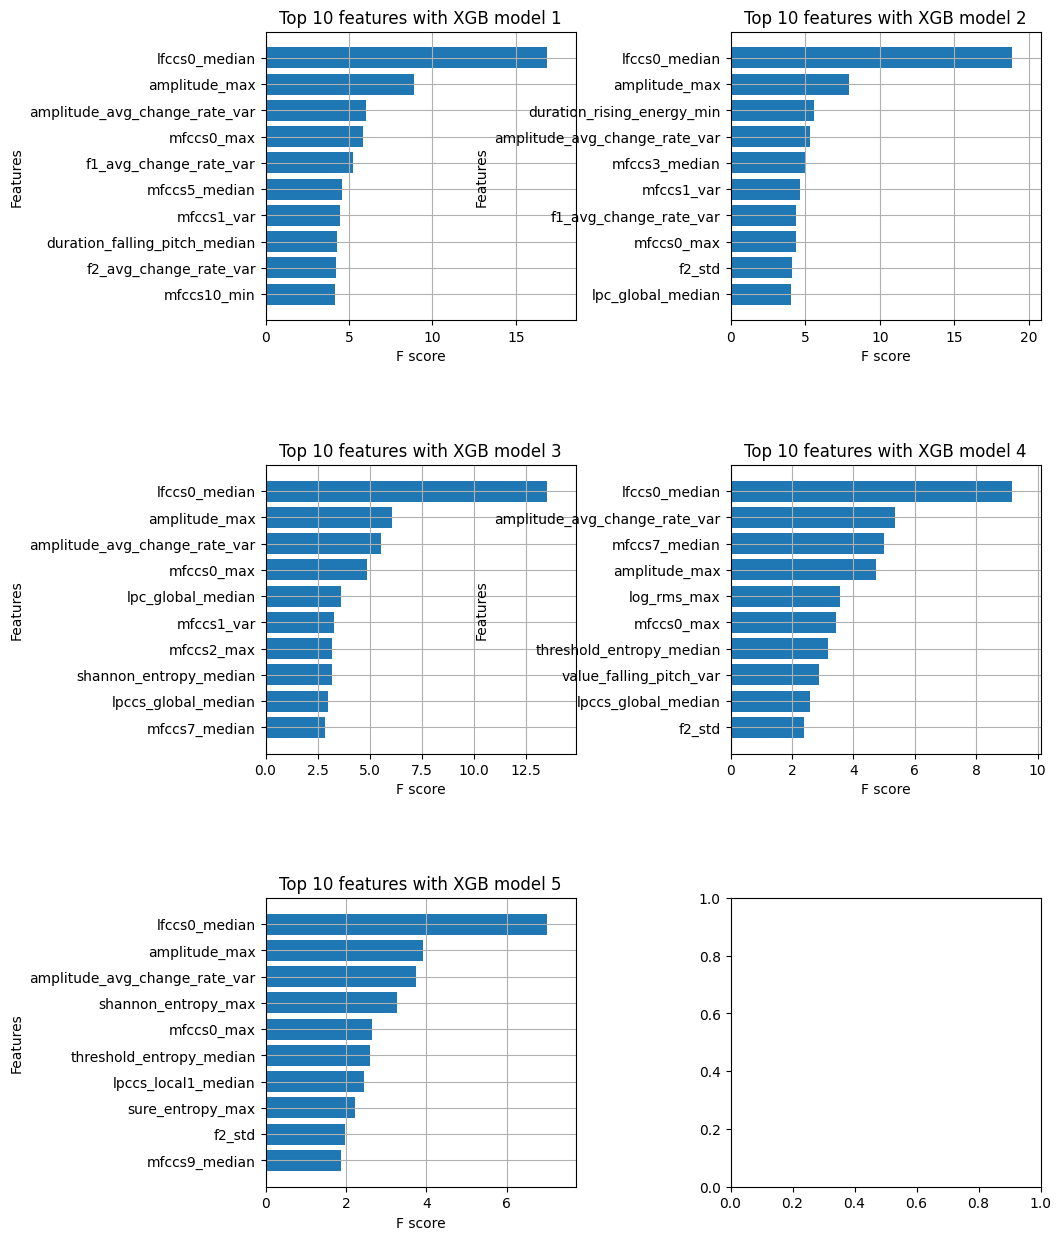

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 130 important features. Too many to print...
Total Time taken for featurewiz selection = 27 seconds
Output contains a list of 130 important features and a train dataframe


In [7]:
# automatic feature selection by using featurewiz package
selected_features_ravdess, df_ravdess_reduced = featurewiz(df_ravdess, 'label', corr_limit=0.9, verbose=2, sep=",", 
                                                           header=0,test_data="", feature_engg="", category_encoders="")

In [8]:
# save ravdess data set with selected features in order to run feature importance on local
df_ravdess_reduced.to_pickle('../results/df_ravdess_reduced.pkl')

In [9]:
# load train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df_ravdess_reduced, test_size=0.3)

A snippet of the data:


lfccs0_median  amplitude_max  amplitude_avg_change_rate_var  mfccs0_max  \
9        -0.178899      -0.171414                      -0.345116    0.313787   
570      -1.481432      -0.727214                      -0.443675   -1.069141   
605       1.748316       1.402158                       2.547566    1.327733   
891       0.730244       0.229396                      -0.043905    0.423285   
506      -0.591614      -0.636251                      -0.436122   -0.795509   

     f1_avg_change_rate_var  mfccs5_median  mfccs1_var  \
9                 -0.477928      -0.261785    0.523581   
570               -0.179753       0.464717    1.415780   
605               -0.608444      -1.084210   -2.148868   
891               -0.020599      -0.814465    1.496563   
506               -0.666570       0.311031    0.635431   

     duration_falling_pitch_median  f2_avg_change_rate_var  mfccs10_min  \
9                        -1.186518               -0.241263    -1.937692   
570                       1.056926               -0.234982     0.617408   
605                      -1.186518               -0.922697     0.631830   
891                      -0.064796               -0.750039    -2.058312   
506                       0.309111               -0.683064     1.320986   

       f2_std  duration_falling_pitch_iqr  mfccs3_median  mfccs8_min  \
9   -0.910287                   -0.337728      -0.891005    0.444658   
570  0.243770                   -0.931690       0.883347    0.720865   
605 -1.097823                   -0.403724      -0.891005    0.397936   
891 -0.674023                    0.916191      -0.891005    0.723077   
506 -0.261181                   -0.667707       0.907250   -0.009254   

     lpccs_global_median  lfccs2_var  value_falling_pitch_var  \
9              -0.481830   -0.745576                 1.213624   
570            -0.553829   -0.228435                 1.553686   
605             1.192733   -1.121690                 2.143867   
891             0.379350    0.314506                -0.210325   
506            -0.199777    1.212284                -0.607165   

     lpc_global_median  delta_mfccs2_var  lfccs3_median  mfccs2_max  \
9            -0.108963          0.059806       0.521102   -0.622456   
570          -0.531058         -0.770202       0.057545    1.822551   
605           0.130273          1.967476      -1.941806   -2.679121   
891          -0.659192         -0.603123       0.358027    1.155091   
506          -0.660245          0.177813      -0.420931    0.652876   

     mfccs1_max  lpccs_local0_mean  lfccs10_mean  lpc_local4_var  \
9      0.696913          -0.606869     -0.417613       -0.047486   
570    1.133978          -1.385550      0.417547       -0.032123   
605   -2.911783           1.868072     -0.965156       -0.043499   
891    1.331571           0.178236     -1.410982       -0.046009   
506    0.106691          -0.712198      0.451382       -0.033614   

     threshold_entropy_mean  delta_mfccs4_var  log_rms_max  mfccs12_median  \
9                 -0.518297         -0.919316    -0.200047        1.044145   
570                0.874906          0.212710    -0.700692        0.630677   
605               -2.034169         -0.646072     1.554681       -0.601464   
891                1.057698         -0.339826     0.493446       -0.125443   
506                1.448309          0.769070    -0.587827       -1.282753   

      f3_mean  shannon_entropy_median  lpccs_local4_median  mfccs2_mean  \
9   -0.494511                0.458147            -0.605440    -0.033999   
570 -2.509165               -1.235410            -0.829059     1.948502   
605  1.402143                1.118778             1.563294    -2.166220   
891  0.164084                0.183541             0.469611    -0.191594   
506 -0.037485                0.122590            -0.659152     0.633105   

     threshold_entropy_median  mfccs5_max  mfccs6_min  lfccs7_mean  \
9                   -0.239819    0.354415    1.705359     0.803220   
570 

There are 739 entries with 130 columns in the training data.
There are 317 entries with 130 columns in the testing data.


### SVM


Evaluation: f1_score
100.00% for the train data
72.75% for the test data

Evaluation: accuracy_score
100.00% for the train data
73.82% for the test data

Evaluation: precision_score
100.00% for the train data
73.02% for the test data

Evaluation: recall_score
100.00% for the train data
73.19% for the test data

Evaluation: confusion_matrix of test predictions


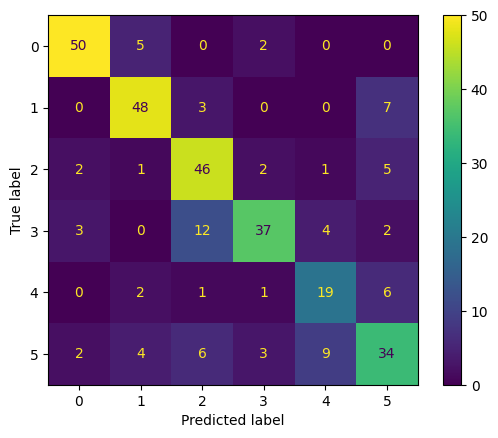


Hard cases for the model:

Label: happiness(3)
Hard cases of false negatives: ['fear(2)']

Label: neutral(4)
Hard cases of false negatives: ['sadness(5)']
Hard cases of false positives: ['sadness(5)']



In [10]:
svm_best_model = load_model('SVC', 'f1_macro', name_spec='final')
svm_ravdess_reduced = SVC().set_params(**svm_best_model.get_params())
svm_ravdess_reduced.fit(X_train, y_train)
model_eval(svm_ravdess_reduced, X_train, X_test, y_train, y_test, confusion=True, emotions='ravdess')

RBF kernel. Computing permutation importance.


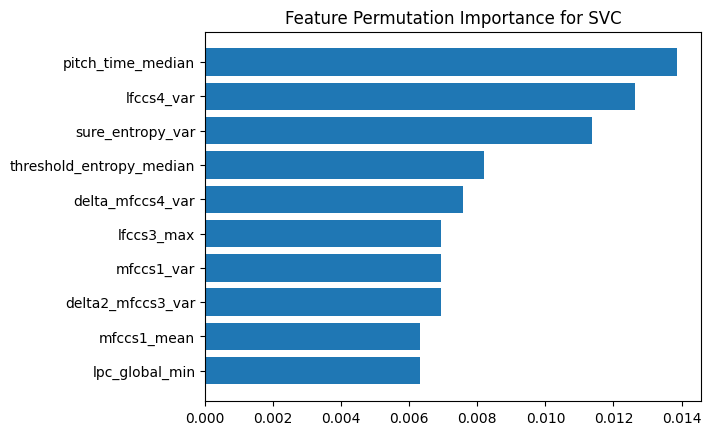

In [11]:
feature_imp_svm = feature_importance(svm_ravdess_reduced, X_test, y_test, top=10)

In [12]:
feature_imp_svm

('pitch_time_median',
 'lfccs4_var',
 'sure_entropy_var',
 'threshold_entropy_median',
 'delta_mfccs4_var',
 'lfccs3_max',
 'mfccs1_var',
 'delta2_mfccs3_var',
 'mfccs1_mean',
 'lpc_global_min')

### Random Forest


Evaluation: f1_score
100.00% for the train data
61.97% for the test data

Evaluation: accuracy_score
100.00% for the train data
62.78% for the test data

Evaluation: precision_score
100.00% for the train data
62.08% for the test data

Evaluation: recall_score
100.00% for the train data
62.79% for the test data

Evaluation: confusion_matrix of test predictions


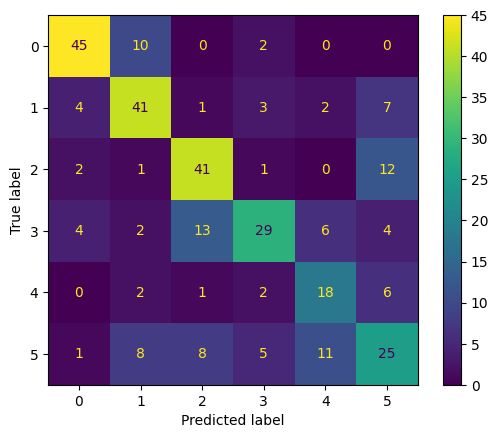


Hard cases for the model:

Label: fear(2)
Hard cases of false negatives: ['sadness(5)']
Hard cases of false positives: ['happiness(3)']

Label: happiness(3)
Hard cases of false negatives: ['fear(2)']

Label: neutral(4)
Hard cases of false negatives: ['sadness(5)']
Hard cases of false positives: ['sadness(5)']

Label: sadness(5)
Hard cases of false positives: ['fear(2)']



In [13]:
rfc_best_model = load_model('RandomForestClassifier', 'f1_macro', name_spec='final')
rfc_ravdess_reduced = RandomForestClassifier().set_params(**rfc_best_model.get_params())
rfc_ravdess_reduced.fit(X_train, y_train)
model_eval(rfc_ravdess_reduced, X_train, X_test, y_train, y_test, confusion=True, emotions='ravdess')

### XGB


Evaluation: f1_score
100.00% for the train data
65.38% for the test data

Evaluation: accuracy_score
100.00% for the train data
66.25% for the test data

Evaluation: precision_score
100.00% for the train data
65.67% for the test data

Evaluation: recall_score
100.00% for the train data
65.39% for the test data

Evaluation: confusion_matrix of test predictions


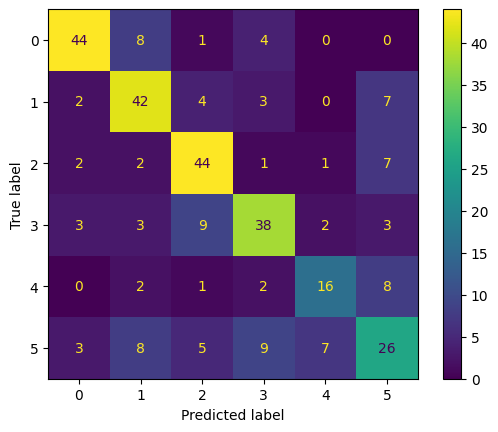


Hard cases for the model:

Label: neutral(4)
Hard cases of false negatives: ['sadness(5)']
Hard cases of false positives: ['sadness(5)']



In [14]:
xgb_best_model = load_model('XGBClassifier', 'f1_macro', name_spec='final')
xgb_ravdess_reduced = XGBClassifier().set_params(**xgb_best_model.get_params())
xgb_ravdess_reduced.fit(X_train, y_train)
model_eval(xgb_ravdess_reduced, X_train, X_test, y_train, y_test, confusion=True, emotions='ravdess')

# 2) EmoDB + RAVDESS
## a) EmoDB + Ravdess with most important features from featurewiz 97

In [15]:
# get most important features (featurewiz 97)
df = pd.read_pickle('../results/df_prep_most_important97.pkl')
feat_most_imp97 = df.columns.to_list() 

# load data
df_emo_rav = pd.read_pickle('../results/df_prep_numerical_only_all_stats_emodb_ravdess.pkl')

# check if there are any features in the saved set of most important features from emodb
mis_cols = list(set(feat_most_imp97) - set(df_emo_rav.columns.to_list()))
print(f'{mis_cols} are missing in the Ravdess feature set and are removed from the list.')
for feat in mis_cols:
    feat_most_imp97.remove(feat)
    
# select features    
df_emo_rav_most_imp97 = df_emo_rav[feat_most_imp97]

# load train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df_emo_rav_most_imp97, test_size=0.3)

['f0_avg_change_rate_median'] are missing in the Ravdess feature set and are removed from the list.
A snippet of the data:


rms_min  mfccs5_mean   zcr_max  duration_rising_pitch_max  \
929  -0.389684     1.025865 -1.439237                   0.497759   
332  -0.242957    -3.082846  1.095629                  -1.712043   
590  -0.395241    -0.928347  0.280063                   0.524383   
1057 -0.395241     0.278635  0.416726                   0.471135   
1272 -0.387509     0.483021 -0.791193                   0.737376   

      lpccs_local4_min  lfccs9_max       min  energy_median  lfccs0_median  \
929           0.025078    0.389687  0.953889      -0.570516      -0.895317   
332           0.025078   -2.129802 -1.397798      -0.050203       1.261433   
590           0.025078    0.338217  0.336884      -0.580028      -0.496794   
1057          0.025078    0.387762  0.914828      -0.579545      -0.935066   
1272          0.025078   -0.079669 -0.425827      -0.574837      -0.299401   

      lpccs_global_median  lpc_global_mean  value_falling_energy_max  \
929             -1.578410        -0.417337                  0.262549   
332              1.309661         0.771973                  0.087444   
590              0.108196        -0.283999                  0.262551   
1057            -0.696447        -0.527785                  0.262550   
1272             0.570023        -0.561557                  0.262550   

      mfccs11_mean    f1_min  lpc_local3_var  lpccs_local0_var  lfccs9_median  \
929      -0.068112 -0.515756       -0.035311         -0.740381       0.293678   
332      -2.096397  0.830973       -0.035338         -0.985192      -2.534610   
590      -0.733113 -1.042390       -0.035328          1.049104      -0.916593   
1057      0.418253 -0.795695       -0.035237          0.389740       0.667928   
1272      1.087785 -1.223403        0.031040          6.647566       0.049641   

      delta_mfccs0_min  value_falling_pitch_iqr  lpc_local1_mean  \
929           0.697277                -0.747259        -0.019987   
332          -0.663380                -0.148577        -1.166075   
590           0.451104                 0.235534         0.117031   
1057          0.645149                -0.279007         0.331443   
1272          0.328545                 0.478689        -0.965502   

      f1_avg_change_rate_var  threshold_entropy_var  mfccs3_max   f2_mean  \
929                 0.311181               0.398047    0.783182  0.057856   
332                -0.251426              -1.737090   -1.855194  0.524450   
590                -0.707953               0.559364   -1.030941  1.389850   
1057               -0.061743               0.732740   -0.096067  0.026555   
1272                0.913134               0.634742   -1.022590  0.161999   

      lfccs7_var  lfccs9_var  delta_mfccs5_median  mfccs4_max  energy_var  \
929    -0.743315   -1.011044            -0.235358    0.402247   -0.594172   
332     1.036696    0.460005            -3.386362   -1.571556    0.762226   
590    -0.150174    0.055637            -0.059190    0.136513   -0.660240   
1057   -0.795695   -0.526369            -0.059190    1.157934   -1.007747   
1272   -0.892718   -1.206715            -0.232749    0.748889   -0.759318   

      delta2_mfccs3_min  lpccs_local5_mean  shannon_entropy_mean  \
929            0.846199          -0.025078             -1.016597   
332           -2.016731          -0.025078              1.431865   
590            0.150088          -0.025078             -0.641663   
1057          -0.239436          -0.025078             -0.764336   
1272           0.442994          -0.025078              0.074254   

      delta2_mfccs5_mean  delta_mfccs4_median   f3_mean  mfccs5_var  \
929            -0.184422            -0.083890 -1.481067   -0.620040   
332             2.909185            -0.629161 -0.699803    0.460593   
590            -0.228423            -0.170424  0.762419   -0.126285   
1057           -0.264112            -0.170424 -0.696372   -0.730759   
1272           -0.236324            -0.248055 -0.531788   -0.981201   

      voiced_var  duration_rising_ener

There are 1113 entries with 96 columns in the training data.
There are 478 entries with 96 columns in the testing data.


### SVM


Evaluation: f1_score
99.55% for the train data
73.59% for the test data

Evaluation: accuracy_score
99.55% for the train data
73.64% for the test data

Evaluation: precision_score
99.49% for the train data
73.00% for the test data

Evaluation: recall_score
99.62% for the train data
74.81% for the test data

Evaluation: confusion_matrix of test predictions


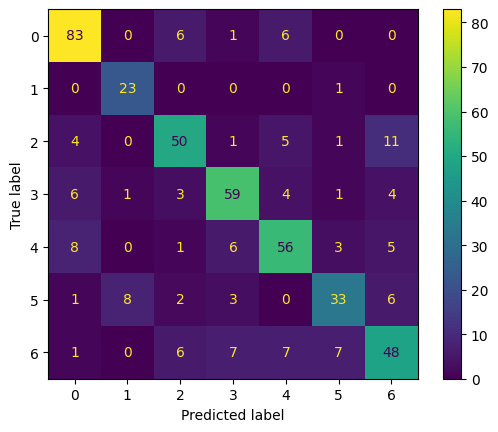


Hard cases for the model:

Label: boredom(1)
Hard cases of false positives: ['neutral(5)']



In [16]:
svm_best_model = load_model('SVC', 'f1_macro', name_spec='final')
svm_emo_rav = SVC().set_params(**svm_best_model.get_params())
svm_emo_rav.fit(X_train, y_train)
model_eval(svm_emo_rav, X_train, X_test, y_train, y_test, confusion=True)

### Random Forest


Evaluation: f1_score
100.00% for the train data
69.29% for the test data

Evaluation: accuracy_score
100.00% for the train data
69.25% for the test data

Evaluation: precision_score
100.00% for the train data
68.82% for the test data

Evaluation: recall_score
100.00% for the train data
70.84% for the test data

Evaluation: confusion_matrix of test predictions


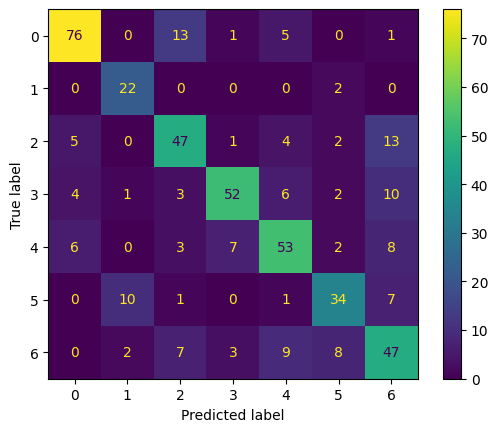


Hard cases for the model:

Label: boredom(1)
Hard cases of false positives: ['neutral(5)']



In [17]:
rfc_best_model = load_model('RandomForestClassifier', 'f1_macro', name_spec='final')
rfc_emo_rav = RandomForestClassifier().set_params(**rfc_best_model.get_params())
rfc_emo_rav.fit(X_train, y_train)
model_eval(rfc_emo_rav, X_train, X_test, y_train, y_test, confusion=True)

### XGB


Evaluation: f1_score
99.92% for the train data
68.49% for the test data

Evaluation: accuracy_score
99.91% for the train data
67.36% for the test data

Evaluation: precision_score
99.92% for the train data
68.41% for the test data

Evaluation: recall_score
99.92% for the train data
69.08% for the test data

Evaluation: confusion_matrix of test predictions


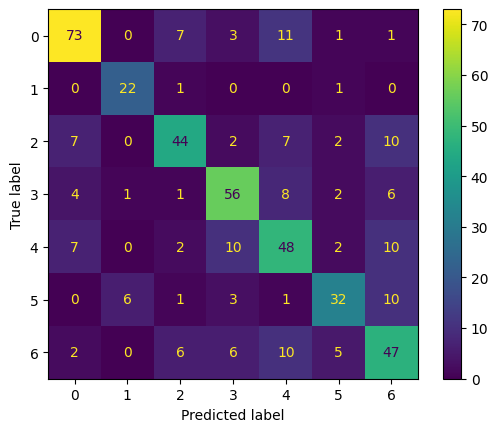


Hard cases for the model:

Label: boredom(1)
Hard cases of false positives: ['neutral(5)']



In [18]:
xgb_best_model = load_model('XGBClassifier', 'f1_macro', name_spec='final')
xgb_emo_rav = XGBClassifier().set_params(**xgb_best_model.get_params())
xgb_emo_rav.fit(X_train, y_train)
model_eval(xgb_emo_rav, X_train, X_test, y_train, y_test, confusion=True)

## b) EmoDB + Ravdess own feature selection

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.9 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (1591, 578)
#### Single_Label Multi_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#############################################

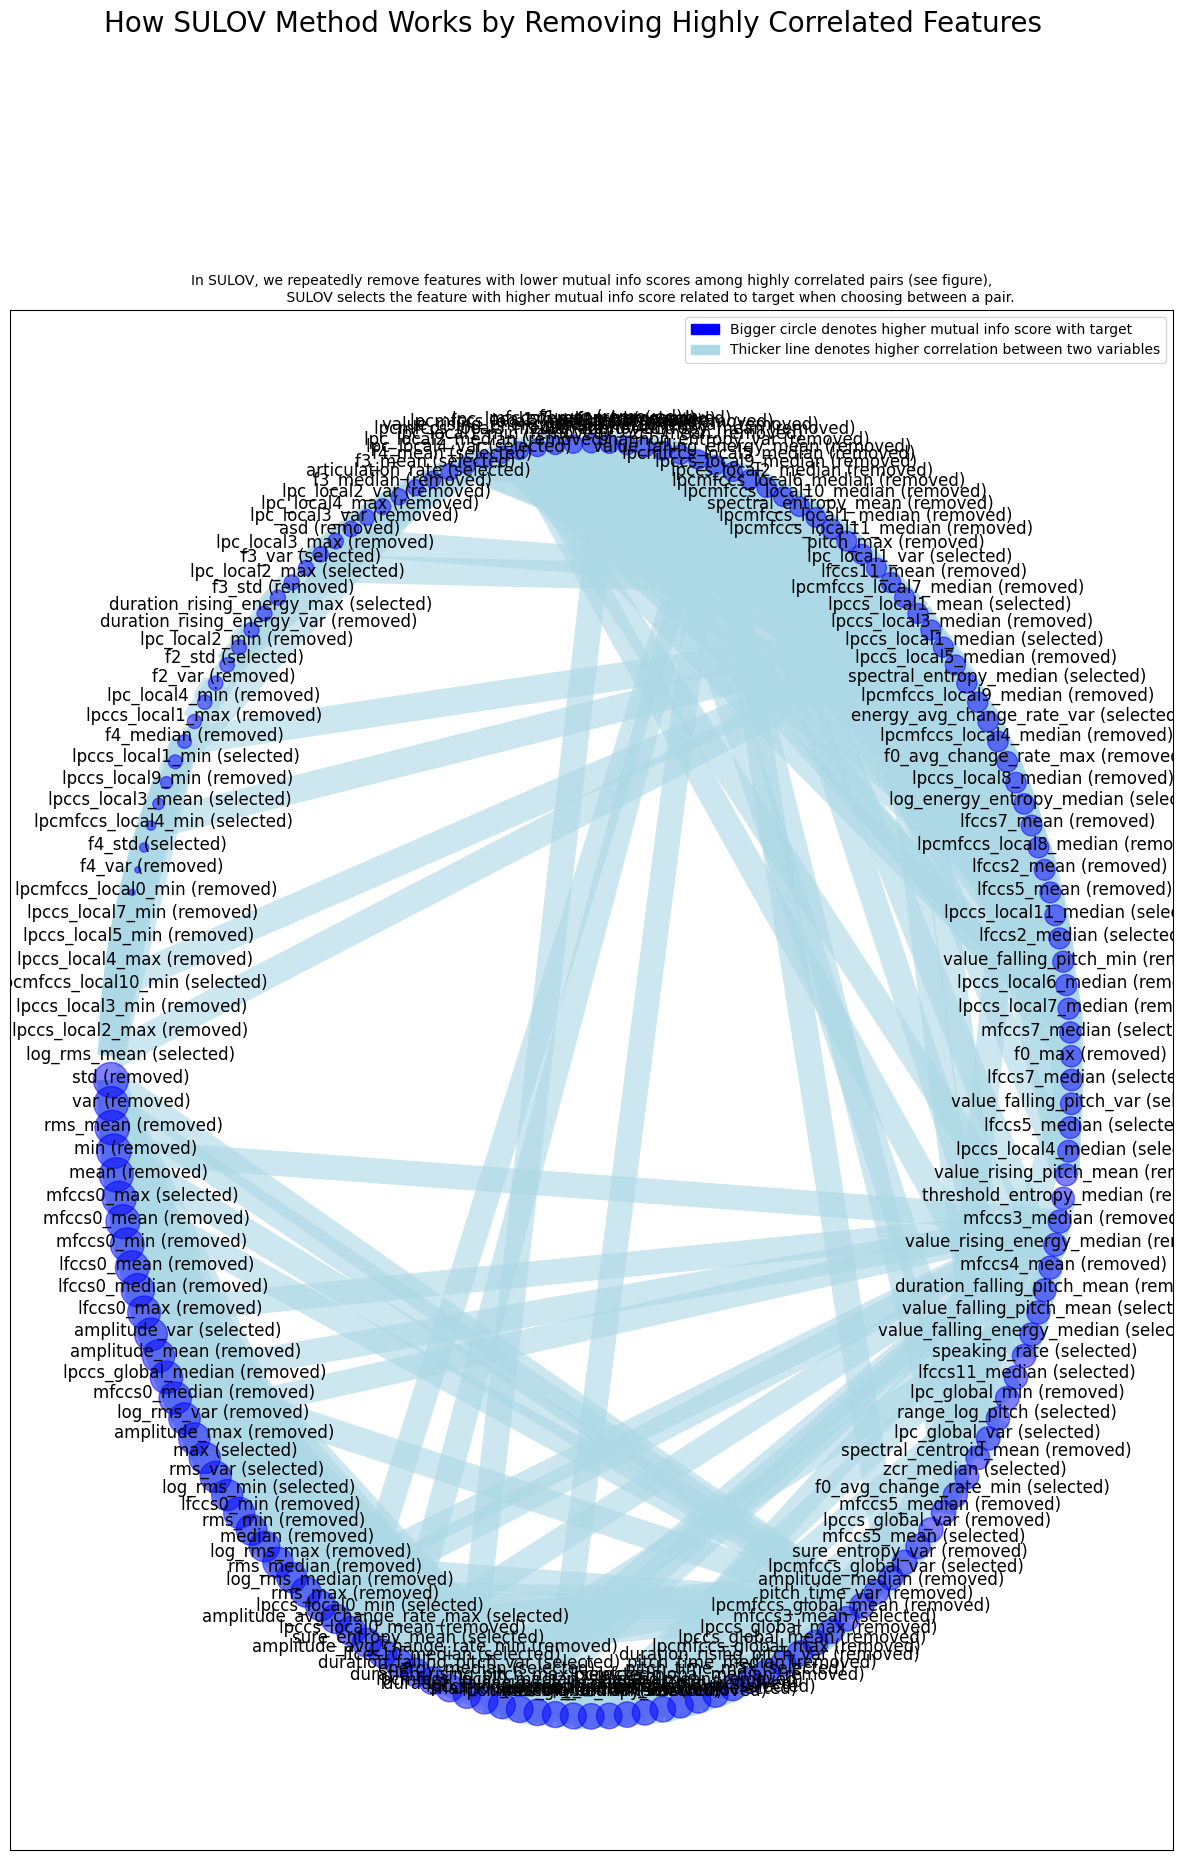

Time taken for SULOV method = 6 seconds
    Adding 0 categorical variables to reduced numeric variables  of 467
Finally 467 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 467 
    Taking top 86 features per iteration...
    XGBoost version using 1.7.5 as tree method: hist
Number of booster rounds = 100
        using 467 variables...
            selecting 91 features in this iteration
            Time taken for regular XGBoost feature selection = 10 seconds
        using 374 variables...
            selecting 74 features in this iteration
            Time taken for regular XGBoost feature selection = 8 se

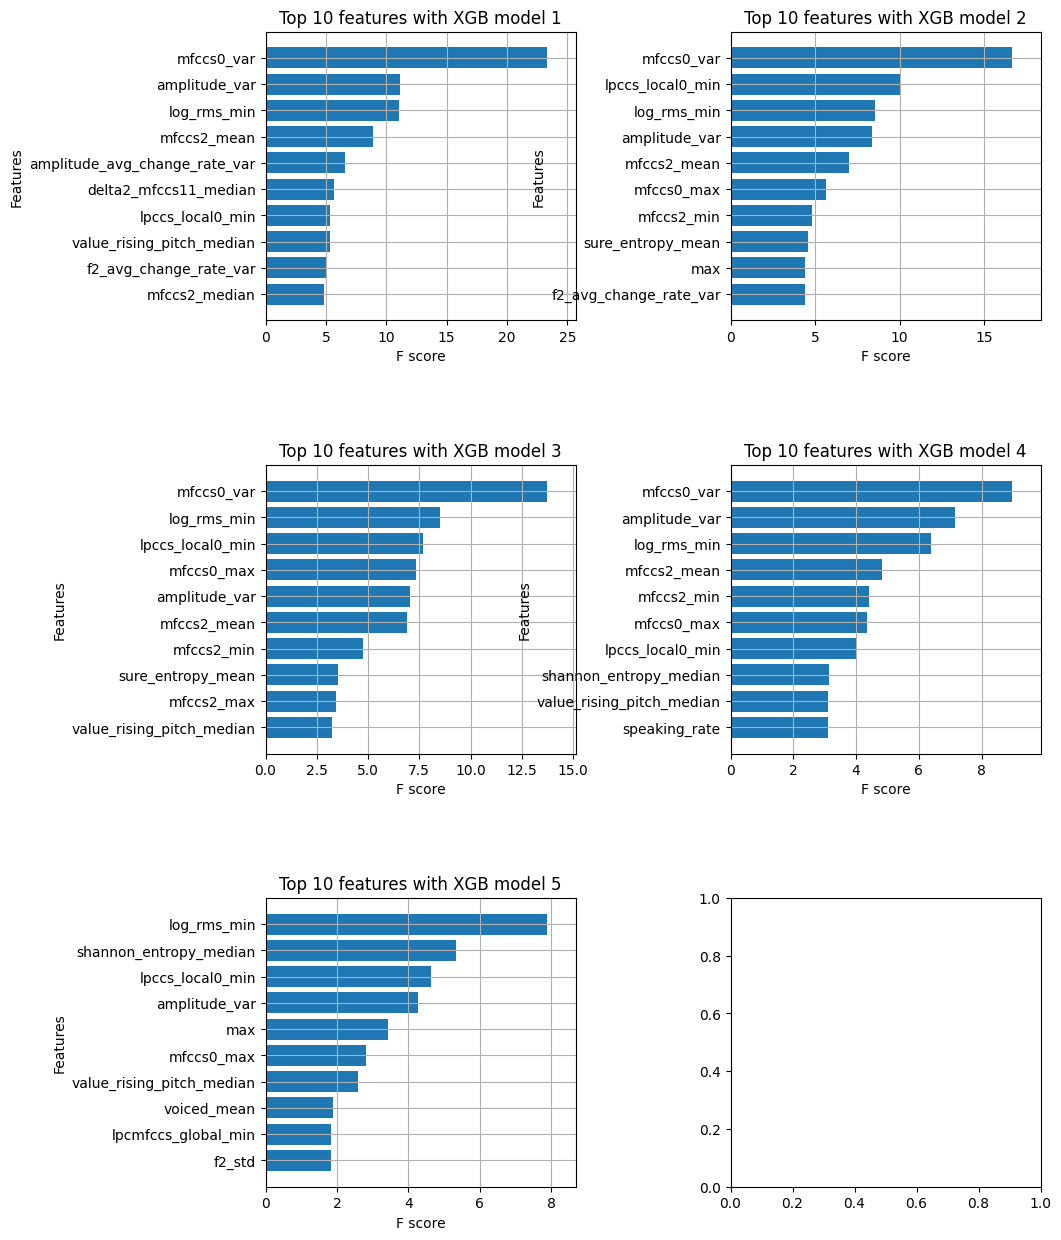

    Completed XGBoost feature selection in 2 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 127 important features. Too many to print...
Total Time taken for featurewiz selection = 46 seconds
Output contains a list of 127 important features and a train dataframe


In [19]:
# automatic feature selection by using featurewiz package
selected_features_emo_rav, df_emo_rav_reduced = featurewiz(df_emo_rav, 'label', corr_limit=0.9, verbose=2, sep=",", 
                                                           header=0,test_data="", feature_engg="", category_encoders="")

In [20]:
# save ravdess data set with selected features in order to run feature importance on local
df_emo_rav_reduced.to_pickle('../results/df_emo_rav_reduced.pkl')

In [21]:
# load train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df_emo_rav_reduced, test_size=0.3)

A snippet of the data:


mfccs0_var  amplitude_var  log_rms_min  mfccs2_mean  \
929     0.127237      -0.769282    -0.376664     0.460574   
332    -1.454022       2.334459    -0.199002    -2.227416   
590     0.657194      -0.649280    -0.381306    -0.774164   
1057    0.744431      -0.772419    -0.381306     0.275776   
1272    0.822218      -0.172115    -0.375599    -0.150976   

      amplitude_avg_change_rate_var  delta2_mfccs11_median  lpccs_local0_min  \
929                       -0.624576              -0.242746         -0.046180   
332                        2.923660               0.302858          0.896305   
590                       -0.609586              -0.303662         -0.974494   
1057                      -0.624693              -0.303662         -1.178330   
1272                      -0.493883              -0.222861          0.015648   

      value_rising_pitch_median  f2_avg_change_rate_var  mfccs2_median  \
929                   -0.612173                0.715432       0.961435   
332                   -0.041243               -0.639527      -3.335237   
590                    0.728220               -0.728084       0.064991   
1057                  -0.248950               -0.398695       0.064991   
1272                  -0.231009                1.110150       0.146094   

      mfccs2_min   zcr_max  f1_median  speaking_rate  mfccs5_mean  mfccs0_max  \
929     0.226622 -1.439237  -0.167571      -0.889352     1.025865   -1.259403   
332    -1.540456  1.095629   1.492108       2.444835    -3.082846    1.139325   
590    -1.573120  0.280063   0.241334      -0.371844    -0.928347   -0.142716   
1057    0.584616  0.416726   0.211899      -0.679095     0.278635   -0.943681   
1272    0.269429 -0.791193   0.994717      -0.519983     0.483021    0.432059   

      delta_mfccs6_var    f2_std  lpccs_local1_median       max  mfccs2_max  \
929           0.278219  1.096726             0.056217 -0.931482    0.079685   
332          -0.804488 -1.370479            -0.970953  1.437435   -0.516169   
590          -0.647464 -0.494105             0.249743 -0.421704    0.151822   
1057         -1.051976 -1.217130             0.813185 -0.960209   -0.198078   
1272          0.014535  0.730575             0.307904  0.433106   -1.192069   

      shannon_entropy_median  value_falling_pitch_iqr  lpc_global_mean  \
929                -0.284036                -0.747259        -0.417337   
332                 1.013334                -0.148577         0.771973   
590                -0.285646                 0.235534        -0.283999   
1057               -0.773631                -0.279007        -0.527785   
1272                0.672565                 0.478689        -0.561557   

      lpc_local4_mean  mfccs6_median  lfccs1_median  lfccs8_var  \
929         -0.842036       0.863420       0.199080   -0.066650   
332         -1.002666      -1.630585       0.975558    1.119437   
590         -1.050943       0.299645      -0.882338   -0.341138   
1057        -0.688801       0.498801      -0.234053   -1.025477   
1272         1.844773       0.705004      -1.758399   -0.883646   

      mfccs12_median  delta2_mfccs3_var  lfccs7_median  mfccs1_mean  \
929         0.140306          -0.653006      -0.300793     1.280100   
332        -1.520962           1.204331       0.710612    -0.408219   
590        -0.823547          -0.663922      -0.989829    -0.376094   
1057       -0.738718          -0.674762      -0.169821     0.408023   
1272        0.623773          -0.761010      -0.516846    -0.920802   

      lpccs_local1_min  mfccs5_min  energy_median  delta_mfccs4_var  \
929           0.032408    0.671051      -0.570516         -0.943871   
332           0.032408   -1.003141      -0.050203         -0.283513   
590           0.032407   -1.009770      -0.580028         -0.341972   
1057          0.032408    0.674780      -0.579545         -0.397560   
1272         -6.724973    0.774517      -0.574837         -0.446467   

      f1_avg_change_rate_var  delta2_mfccs0_var  

There are 1113 entries with 127 columns in the training data.
There are 478 entries with 127 columns in the testing data.


### SVM


Evaluation: f1_score
99.57% for the train data
79.17% for the test data

Evaluation: accuracy_score
99.55% for the train data
78.87% for the test data

Evaluation: precision_score
99.55% for the train data
78.65% for the test data

Evaluation: recall_score
99.60% for the train data
80.15% for the test data

Evaluation: confusion_matrix of test predictions


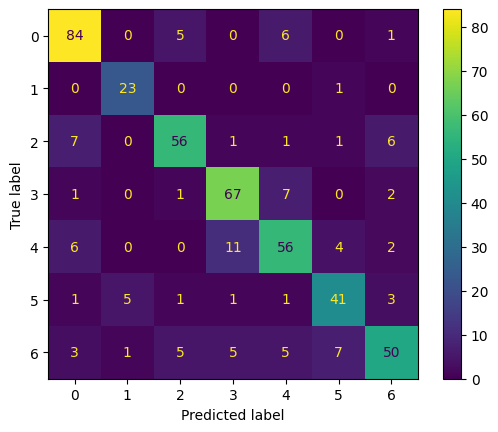


Hard cases for the model:



In [22]:
svm_best_model = load_model('SVC', 'f1_macro', name_spec='final')
svm_emo_rav_reduced = SVC().set_params(**svm_best_model.get_params())
svm_emo_rav_reduced.fit(X_train, y_train)
model_eval(svm_emo_rav_reduced, X_train, X_test, y_train, y_test, confusion=True)

RBF kernel. Computing permutation importance.


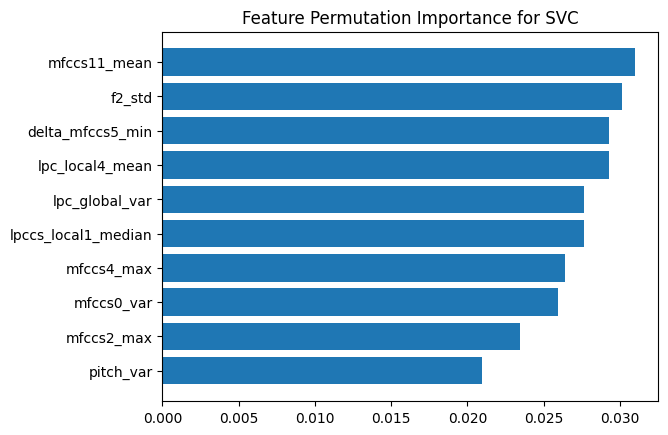

In [23]:
feature_imp_svm = feature_importance(svm_emo_rav_reduced, X_test, y_test, top=10)

In [24]:
feature_imp_svm

('mfccs11_mean',
 'f2_std',
 'delta_mfccs5_min',
 'lpc_local4_mean',
 'lpc_global_var',
 'lpccs_local1_median',
 'mfccs4_max',
 'mfccs0_var',
 'mfccs2_max',
 'pitch_var')

### Random Forest


Evaluation: f1_score
99.86% for the train data
70.96% for the test data

Evaluation: accuracy_score
99.82% for the train data
70.92% for the test data

Evaluation: precision_score
99.84% for the train data
70.12% for the test data

Evaluation: recall_score
99.87% for the train data
72.38% for the test data

Evaluation: confusion_matrix of test predictions


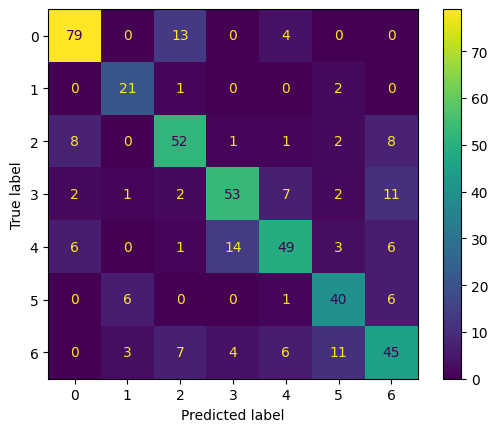


Hard cases for the model:



In [25]:
rfc_best_model = load_model('RandomForestClassifier', 'f1_macro', name_spec='final')
rfc_emo_rav_reduced = RandomForestClassifier().set_params(**rfc_best_model.get_params())
rfc_emo_rav_reduced.fit(X_train, y_train)
model_eval(rfc_emo_rav_reduced, X_train, X_test, y_train, y_test, confusion=True)

### XGB


Evaluation: f1_score
100.00% for the train data
71.81% for the test data

Evaluation: accuracy_score
100.00% for the train data
71.97% for the test data

Evaluation: precision_score
100.00% for the train data
71.52% for the test data

Evaluation: recall_score
100.00% for the train data
72.24% for the test data

Evaluation: confusion_matrix of test predictions


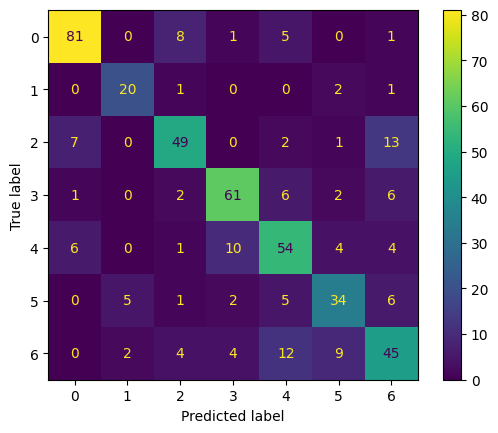


Hard cases for the model:



In [26]:
xgb_best_model = load_model('XGBClassifier', 'f1_macro', name_spec='final')
xgb_emo_rav_reduced = XGBClassifier().set_params(**xgb_best_model.get_params())
xgb_emo_rav_reduced.fit(X_train, y_train)
model_eval(xgb_emo_rav_reduced, X_train, X_test, y_train, y_test, confusion=True)

# 3) IEMOCAP only
## a) Iemocap with most important features from featurewiz 97

In [27]:
# get most important features (featurewiz 97)
df = pd.read_pickle('../results/df_prep_most_important97.pkl')
feat_most_imp97 = df.columns.to_list()

# load data
df_iemocap = pd.read_pickle('../results/df_prep_numerical_only_all_stats_iemocap.pkl')

# check if there are any features in the saved set of most important features from emodb
mis_cols = list(set(feat_most_imp97) - set(df_iemocap.columns.to_list()))
print(f'{mis_cols} are missing in the Iemocap feature set and are removed from the list.')
for feat in mis_cols:
    feat_most_imp97.remove(feat) 

# select features
df_iemocap_most_imp97 = df_iemocap[feat_most_imp97]

# load train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df_iemocap_most_imp97, test_size=0.3)

[] are missing in the Iemocap feature set and are removed from the list.
A snippet of the data:


rms_min  mfccs5_mean   zcr_max  duration_rising_pitch_max  \
735  -0.229509    -1.070334  0.729021                  -0.918953   
1247 -0.377306     1.719883 -1.351664                  -0.311118   
1362 -0.389425     0.639489 -0.523430                   0.209883   
1759 -0.298078     1.463116  0.772789                   1.668688   
759  -0.273248    -0.196919 -0.991416                  -1.092620   

      lpccs_local4_min  lfccs9_max       min  energy_median  lfccs0_median  \
735          -0.156343   -0.093146 -3.084508       0.107065       2.826949   
1247          1.141032   -0.184050  0.834509      -0.116537      -1.425913   
1362          0.082592    0.566703  0.679285      -0.369601      -0.719986   
1759          0.070874    0.218921  0.702696      -0.637881      -1.078084   
759          -0.334691   -1.201885  0.626730       2.173135      -0.115169   

      lpccs_global_median  lpc_global_mean  value_falling_energy_max  \
735              2.520223         4.719214                  0.170306   
1247            -1.732743        -0.992621                  0.112599   
1362            -0.798659        -0.355743                  0.142788   
1759             0.387390         1.493283                  0.164857   
759             -0.695362        -0.720937                 -0.848937   

      mfccs11_mean    f1_min  lpc_local3_var  lpccs_local0_var  \
735       0.894106  1.194629       -0.533807          0.751138   
1247      0.582794  0.377720       -0.738245         -1.295066   
1362      0.774411  0.620137       -0.082941         -0.133597   
1759      1.665823 -0.063391       -0.494647          0.211192   
759       0.202500  0.895814        0.739660         -1.004836   

      f0_avg_change_rate_median  lfccs9_median  delta_mfccs0_min  \
735                    0.044621      -2.198986         -2.274826   
1247                   0.044621      -0.432425          0.332266   
1362                   0.044621       0.069071          0.336453   
1759                   0.044621       0.830515         -0.308741   
759                    0.044621      -0.497633          1.201858   

      value_falling_pitch_iqr  lpc_local1_mean  f1_avg_change_rate_var  \
735                  0.413975         0.984686               -0.733091   
1247                -0.681845        -0.726682                0.954749   
1362                 1.133583        -0.836912               -0.842719   
1759                -0.394398         1.396344                8.455950   
759                 -0.476155        -1.277714               -0.656736   

      threshold_entropy_var  mfccs3_max   f2_mean  lfccs7_var  lfccs9_var  \
735               -0.416816    0.434847  1.713011    1.035709    0.975585   
1247              -1.790686    0.776187 -1.199529   -1.227328   -0.948690   
1362              -0.214514    0.196125  0.861754    0.773685    0.014319   
1759               0.127121    0.528973  0.780741   -0.441897   -0.832678   
759               -1.301905   -1.218798 -1.189658    0.307843   -0.618574   

      delta_mfccs5_median  mfccs4_max  energy_var  delta2_mfccs3_min  \
735              0.172940    0.079476   -0.598227          -0.202604   
1247             0.006834    0.383063    1.101588          -1.182161   
1362            -0.818626   -0.148326    0.384843           0.513254   
1759            -0.023920    0.952114   -0.514664           0.844515   
759             -0.056390   -1.448587   -0.122595           0.623839   

      lpccs_local5_mean  shannon_entropy_mean  delta2_mfccs5_mean  \
735            0.378881              1.207572           -0.087208   
1247           0.624628             -0.488350           -0.095337   
1362          -0.032855             -0.713716           -0.745356   
1759           1.172223             -0.289582            0.171262   
759           -0.738778              1.310796           -0.171188   

      delta_mfccs4_median   f3_mean  mfccs5_var  voiced_var  \
735              0.728528  0.940906    0.968759    0.879998   
1247    

There are 1565 entries with 97 columns in the training data.
There are 672 entries with 97 columns in the testing data.


### SVM


Evaluation: f1_score
99.60% for the train data
44.88% for the test data

Evaluation: accuracy_score
99.49% for the train data
62.35% for the test data

Evaluation: precision_score
99.53% for the train data
45.03% for the test data

Evaluation: recall_score
99.68% for the train data
45.26% for the test data

Evaluation: confusion_matrix of test predictions


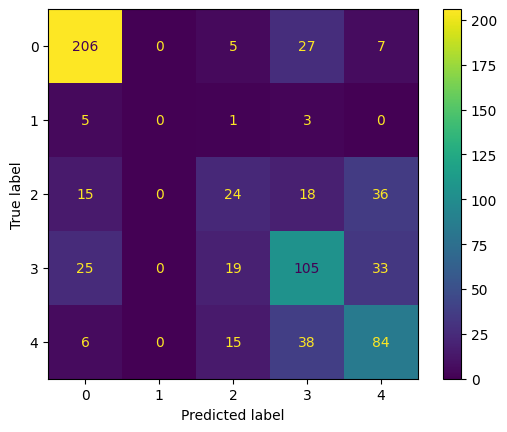


Hard cases for the model:

Label: fear(1)
Hard cases of false negatives: ['anger(0)', 'neutral(3)']

Label: happiness(2)
Hard cases of false negatives: ['sadness(4)']
Hard cases of false positives: ['neutral(3)', 'sadness(4)']

Label: sadness(4)
Hard cases of false negatives: ['neutral(3)']
Hard cases of false positives: ['happiness(2)', 'neutral(3)']



In [28]:
svm_best_model = load_model('SVC', 'f1_macro', name_spec='final')
svm_iemocap = SVC().set_params(**svm_best_model.get_params())
svm_iemocap.fit(X_train, y_train)
model_eval(svm_iemocap, X_train, X_test, y_train, y_test, confusion=True, emotions='iemocap')

### Random Forest


Evaluation: f1_score
99.17% for the train data
43.15% for the test data

Evaluation: accuracy_score
98.85% for the train data
61.90% for the test data

Evaluation: precision_score
99.01% for the train data
44.90% for the test data

Evaluation: recall_score
99.36% for the train data
44.09% for the test data

Evaluation: confusion_matrix of test predictions


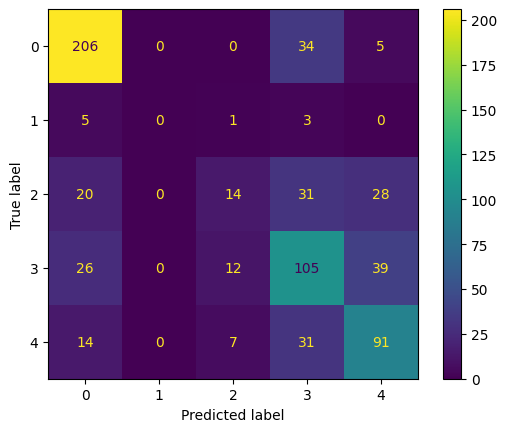


Hard cases for the model:

Label: fear(1)
Hard cases of false negatives: ['anger(0)', 'neutral(3)']

Label: happiness(2)
Hard cases of false negatives: ['anger(0)', 'neutral(3)', 'sadness(4)']
Hard cases of false positives: ['neutral(3)', 'sadness(4)']

Label: neutral(3)
Hard cases of false negatives: ['sadness(4)']

Label: sadness(4)
Hard cases of false negatives: ['neutral(3)']
Hard cases of false positives: ['neutral(3)']



In [29]:
rfc_best_model = load_model('RandomForestClassifier', 'f1_macro', name_spec='final')
rfc_iemocap = RandomForestClassifier().set_params(**rfc_best_model.get_params())
rfc_iemocap.fit(X_train, y_train)
model_eval(rfc_iemocap, X_train, X_test, y_train, y_test, confusion=True, emotions='iemocap')

### XGB


Evaluation: f1_score
94.85% for the train data
44.44% for the test data

Evaluation: accuracy_score
94.12% for the train data
62.50% for the test data

Evaluation: precision_score
95.61% for the train data
45.64% for the test data

Evaluation: recall_score
94.29% for the train data
44.90% for the test data

Evaluation: confusion_matrix of test predictions


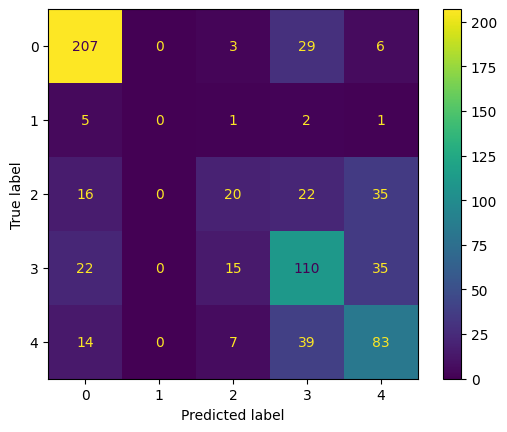


Hard cases for the model:

Label: fear(1)
Hard cases of false negatives: ['anger(0)', 'neutral(3)']

Label: happiness(2)
Hard cases of false negatives: ['neutral(3)', 'sadness(4)']
Hard cases of false positives: ['neutral(3)']

Label: sadness(4)
Hard cases of false negatives: ['neutral(3)']
Hard cases of false positives: ['happiness(2)', 'neutral(3)']



In [30]:
xgb_best_model = load_model('XGBClassifier', 'f1_macro', name_spec='final')
xgb_iemocap = XGBClassifier().set_params(**xgb_best_model.get_params())
xgb_iemocap.fit(X_train, y_train)
model_eval(xgb_iemocap, X_train, X_test, y_train, y_test, confusion=True, emotions='iemocap')

## b) IEMOCAP own feature selection

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.9 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (2237, 595)
#### Single_Label Multi_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#############################################

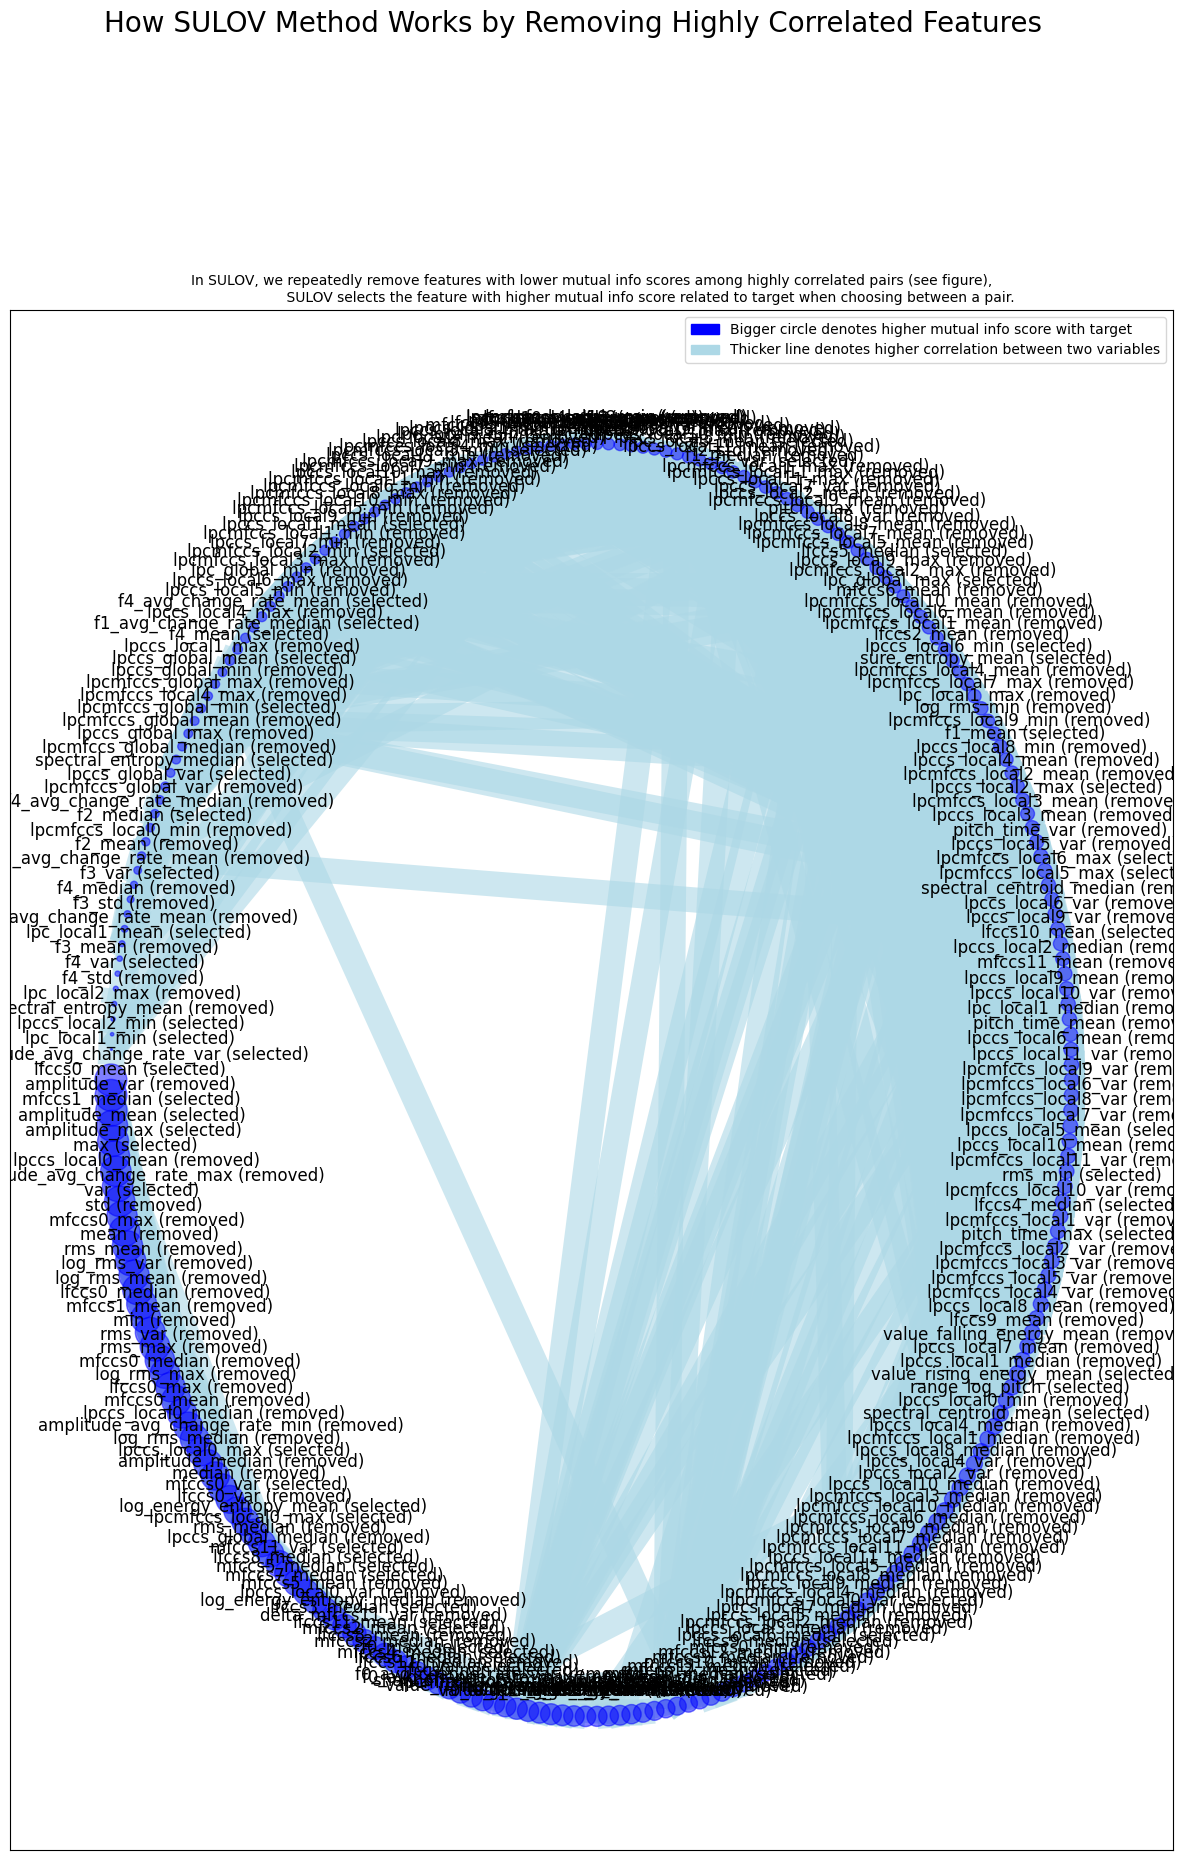

Time taken for SULOV method = 13 seconds
    Adding 0 categorical variables to reduced numeric variables  of 409
Finally 409 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 409 
    Taking top 89 features per iteration...
    XGBoost version using 1.7.5 as tree method: hist
Number of booster rounds = 100
        using 409 variables...
            selecting 113 features in this iteration
            Time taken for regular XGBoost feature selection = 26 seconds
        using 327 variables...
            selecting 98 features in this iteration
            Time taken for regular XGBoost feature selection = 20

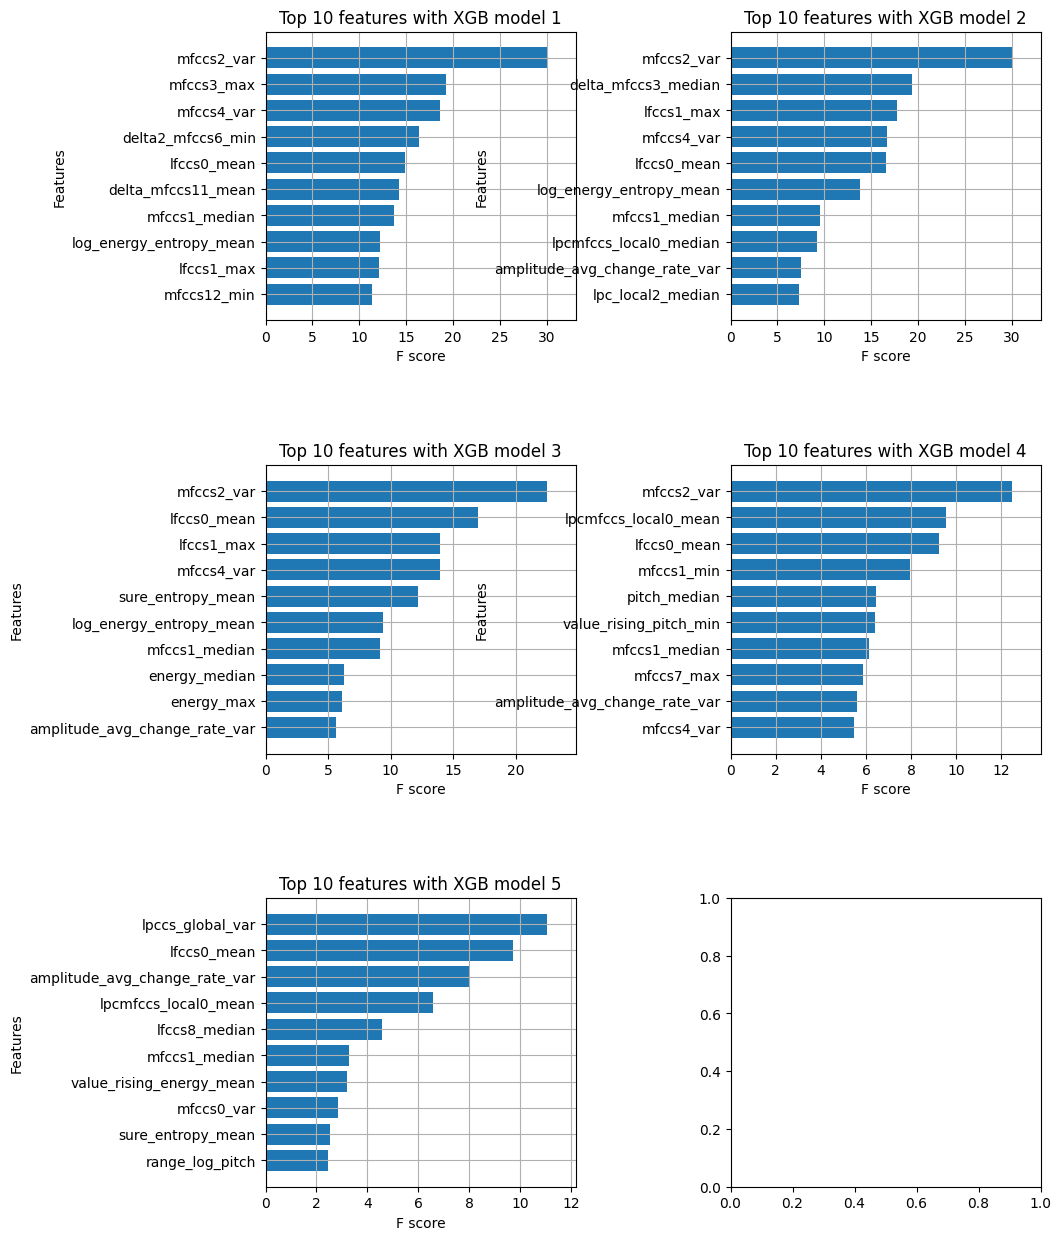

    Completed XGBoost feature selection in 9 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 190 important features. Too many to print...
Total Time taken for featurewiz selection = 117 seconds
Output contains a list of 190 important features and a train dataframe


In [31]:
# automatic feature selection by using featurewiz package
selected_features_iemocap, df_iemocap_reduced = featurewiz(df_iemocap, 'label', corr_limit=0.9, verbose=2, sep=",", 
                                                           header=0,test_data="", feature_engg="", category_encoders="")

In [32]:
df_iemocap_reduced.to_pickle('../results/df_iemocap_reduced.pkl')

In [33]:
# load train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df_iemocap_reduced, test_size=0.3)

A snippet of the data:


mfccs2_var  mfccs3_max  mfccs4_var  delta2_mfccs6_min  lfccs0_mean  \
735     0.243090    0.434847    1.739941          -0.851114     3.055224   
1247   -1.087686    0.776187   -0.941878           0.119043    -1.402438   
1362    0.039262    0.196125   -0.501956          -0.863570    -0.861460   
1759   -0.791433    0.528973   -0.617049          -0.864629    -0.709181   
759    -0.304133   -1.218798   -0.718658           0.839687    -0.216559   

      delta_mfccs11_mean  mfccs1_median  log_energy_entropy_mean  lfccs1_max  \
735            -0.390154      -3.499218                 2.208327   -1.115828   
1247            0.064465       1.349354                -1.571456    0.273490   
1362           -0.076621       1.090232                -0.719999   -0.230565   
1759           -0.199352       1.085007                -1.098396    0.980352   
759            -1.053026       0.809602                 0.324184   -0.610629   

      mfccs12_min  amplitude_avg_change_rate_var  delta_mfccs3_median  \
735     -1.171996                       4.782250             0.074963   
1247     0.601696                      -0.398839            -0.032566   
1362    -0.734119                      -0.378280             0.378760   
1759     0.878508                      -0.390136             0.205697   
759      0.267867                      -0.387307            -0.143107   

      spectral_centroid_max  duration_falling_pitch_min  lpcmfccs_local0_mean  \
735                     0.0                   -0.095497              1.712866   
1247                    0.0                   -0.095497             -0.067219   
1362                    0.0                   -0.095497             -0.094128   
1759                    0.0                   -0.095497              0.336378   
759                     0.0                   -0.095497             -0.320475   

      lpcmfccs_local0_median  duration_rising_energy_var  mfccs4_min  \
735                 3.235497                   -0.194768   -2.101424   
1247               -0.869484                   -0.827703    0.874009   
1362               -0.913934                   -0.750817    0.750988   
1759               -0.528793                    2.704920    0.737003   
759                 0.179237                    1.796953    0.476257   

      delta2_mfccs9_mean  delta2_mfccs2_min    f2_min  mfccs10_max  \
735             0.115457           0.148881 -0.019595     2.084966   
1247           -0.370113           0.893856  0.907221     0.226566   
1362            0.547047           0.980145  2.170084     0.439188   
1759            0.063342           0.745521  0.785402    -0.900285   
759             0.393428          -0.052068 -1.385060    -0.929979   

      value_rising_pitch_min  delta2_mfccs0_var  sure_entropy_mean  \
735                -1.532000           1.982402           1.252378   
1247               -2.084118          -0.764567           0.627514   
1362               -1.460566          -0.029583          -0.857425   
1759               -2.342172          -0.843354           0.788265   
759                 0.025021          -0.748500          -0.124207   

      delta_mfccs0_var  lpc_local4_max       var  duration  \
735           1.346256        0.339110  3.161430  1.904481   
1247         -1.029794       -0.518763 -0.225743 -0.064386   
1362          0.459728       -0.152216 -0.222854 -0.709280   
1759         -0.491817        0.200308 -0.223662  0.628681   
759          -0.707723       -0.631866 -0.215343 -0.409110   

      delta_mfccs10_median  mfccs0_var  delta2_mfccs8_median  \
735              -0.463665    1.355968             -0.188613   
1247             -0.242556   -1.044708              0.786802   
1362             -1.195492    0.022134              0.473890   
1759              0.511594    0.307438             -0.094869   
759              -0.541529   -1.119552              1.747550   

      delta_mfccs12_median  lfccs1_var  spectral_entropy_var  lpc_local3_mean  \
735              -0.384711  

There are 1565 entries with 190 columns in the training data.
There are 672 entries with 190 columns in the testing data.


### SVM


Evaluation: f1_score
99.79% for the train data
50.30% for the test data

Evaluation: accuracy_score
99.74% for the train data
64.14% for the test data

Evaluation: precision_score
99.76% for the train data
66.29% for the test data

Evaluation: recall_score
99.82% for the train data
48.85% for the test data

Evaluation: confusion_matrix of test predictions


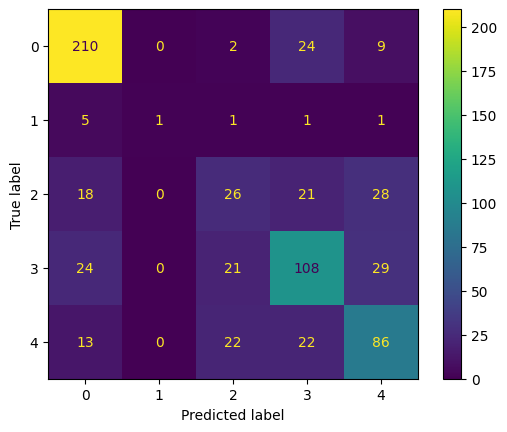


Hard cases for the model:

Label: fear(1)
Hard cases of false negatives: ['anger(0)']

Label: happiness(2)
Hard cases of false negatives: ['neutral(3)', 'sadness(4)']
Hard cases of false positives: ['neutral(3)', 'sadness(4)']



In [34]:
svm_best_model = load_model('SVC', 'f1_macro', name_spec='final')
svm_iemocap_reduced = SVC().set_params(**svm_best_model.get_params())
svm_iemocap_reduced.fit(X_train, y_train)
model_eval(svm_iemocap_reduced, X_train, X_test, y_train, y_test, confusion=True, emotions='iemocap')

### Random Forest


Evaluation: f1_score
98.94% for the train data
45.32% for the test data

Evaluation: accuracy_score
98.47% for the train data
64.29% for the test data

Evaluation: precision_score
98.78% for the train data
47.14% for the test data

Evaluation: recall_score
99.13% for the train data
46.15% for the test data

Evaluation: confusion_matrix of test predictions


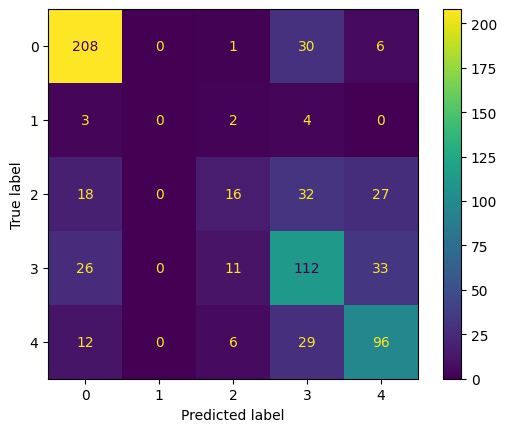


Hard cases for the model:

Label: fear(1)
Hard cases of false negatives: ['anger(0)', 'happiness(2)', 'neutral(3)']

Label: happiness(2)
Hard cases of false negatives: ['neutral(3)', 'sadness(4)']
Hard cases of false positives: ['neutral(3)']

Label: sadness(4)
Hard cases of false negatives: ['neutral(3)']
Hard cases of false positives: ['neutral(3)']



In [35]:
rfc_best_model = load_model('RandomForestClassifier', 'f1_macro', name_spec='final')
rfc_iemocap_reduced = RandomForestClassifier().set_params(**rfc_best_model.get_params())
rfc_iemocap_reduced.fit(X_train, y_train)
model_eval(rfc_iemocap_reduced, X_train, X_test, y_train, y_test, confusion=True, emotions='iemocap')

### XGB


Evaluation: f1_score
96.76% for the train data
48.82% for the test data

Evaluation: accuracy_score
96.23% for the train data
66.52% for the test data

Evaluation: precision_score
97.02% for the train data
50.49% for the test data

Evaluation: recall_score
96.54% for the train data
48.81% for the test data

Evaluation: confusion_matrix of test predictions


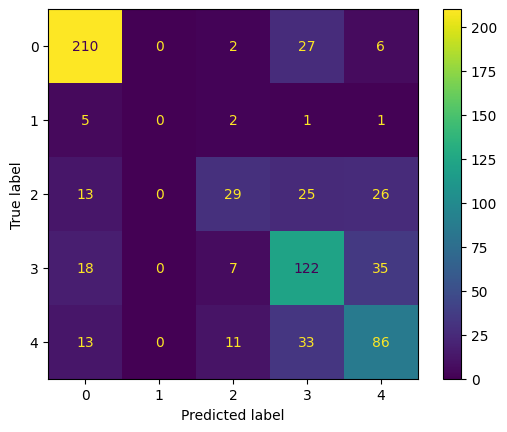


Hard cases for the model:

Label: fear(1)
Hard cases of false negatives: ['anger(0)', 'happiness(2)']

Label: happiness(2)
Hard cases of false negatives: ['neutral(3)', 'sadness(4)']
Hard cases of false positives: ['sadness(4)']

Label: sadness(4)
Hard cases of false negatives: ['neutral(3)']
Hard cases of false positives: ['neutral(3)']



In [36]:
xgb_best_model = load_model('XGBClassifier', 'f1_macro', name_spec='final')
xgb_iemocap_reduced = XGBClassifier().set_params(**xgb_best_model.get_params())
xgb_iemocap_reduced.fit(X_train, y_train)
model_eval(xgb_iemocap_reduced, X_train, X_test, y_train, y_test, confusion=True, emotions='iemocap')

# 4) EmoDB + IEMOCAP
## a) EmoDB + Iemocap with most important features from featurewiz 97

In [37]:
# get most important features (featurewiz 97)
df = pd.read_pickle('../results/df_prep_most_important97.pkl')
feat_most_imp97 = df.columns.to_list() 

# load data
df_emo_iemo = pd.read_pickle('../results/df_prep_numerical_only_all_stats_emodb_iemocap.pkl')

# check if there are any features in the saved set of most important features from emodb
mis_cols = list(set(feat_most_imp97) - set(df_emo_iemo.columns.to_list()))
print(f'{mis_cols} are missing in the Iemocap feature set and are removed from the list.')
for feat in mis_cols:
    feat_most_imp97.remove(feat)
    
# select features    
df_emo_iemo_most_imp97 = df_emo_iemo[feat_most_imp97]

# load train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df_emo_iemo_most_imp97, test_size=0.3)

[] are missing in the Iemocap feature set and are removed from the list.
A snippet of the data:


rms_min  mfccs5_mean   zcr_max  duration_rising_pitch_max  \
128  -0.746492    -1.711497  0.935236                  -0.911828   
1972 -0.209122    -1.098953 -1.584993                  -0.130259   
2678 -0.468242     0.366442  0.424769                   2.960491   
1337 -0.199037     0.694832 -1.495100                  -0.219074   
2625 -0.471788     0.611317  0.463295                  -0.751962   

      lpccs_local4_min  lfccs9_max       min  energy_median  lfccs0_median  \
128          -0.840101   -0.021783 -1.036905       0.167510       1.583046   
1972          1.282675   -1.187382  0.437044      -0.846816      -1.023071   
2678         -0.491134    0.112092  0.799012      -0.732693      -1.092563   
1337          1.207263    0.449135  0.684464      -0.538751      -0.520697   
2625         -0.569476   -0.745534  0.782136       0.610738      -0.443773   

      lpccs_global_median  lpc_global_mean  value_falling_energy_max  \
128              1.622048         4.467967                  0.005330   
1972            -0.305225        -0.799335                  0.240868   
2678            -0.262102        -0.474557                  0.242156   
1337            -0.709019        -0.849474                  0.233272   
2625            -0.499812        -0.176325                  0.237809   

      mfccs11_mean    f1_min  lpc_local3_var  lpccs_local0_var  \
128      -1.906567  0.963039       -0.098615          2.263613   
1972     -0.156345  1.053057       -0.992643          1.716610   
2678      0.078891 -1.417199       -0.239027         -0.504246   
1337      1.333995 -1.168519        0.080997          0.678727   
2625      0.344249  0.607119        0.078019         -0.583236   

      f0_avg_change_rate_median  lfccs9_median  delta_mfccs0_min  \
128                    0.165083       0.293588         -4.777903   
1972                   0.165083       0.551846         -0.088428   
2678                   0.165083       0.032778          0.851841   
1337                   0.165083       0.424242         -0.164528   
2625                   0.165083       0.048677          0.752092   

      value_falling_pitch_iqr  lpc_local1_mean  f1_avg_change_rate_var  \
128                  1.595951         1.141551               -0.730958   
1972                 0.728749        -0.708353               -0.603301   
2678                -0.543322        -0.284307               -0.301032   
1337                -0.253601        -0.439440               -0.193625   
2625                -0.260052         0.353866               -0.595980   

      threshold_entropy_var  mfccs3_max   f2_mean  lfccs7_var  lfccs9_var  \
128               -1.332548   -0.864545  0.942404    2.147966   -0.142802   
1972               2.144481    0.416009  2.349877   -0.599219   -0.770650   
2678               0.977739    0.730973  0.922826   -0.857281   -1.076348   
1337               1.517898    1.899979  0.378901    0.300513   -0.623158   
2625               0.573758   -0.923092  0.013143    0.035408   -0.358950   

      delta_mfccs5_median  mfccs4_max  energy_var  delta2_mfccs3_min  \
128              0.817522    0.042652   -0.123832          -0.323829   
1972             0.474352   -0.678304    1.371180          -1.220559   
2678             0.133942   -0.176358   -2.074778          -0.249409   
1337            -1.625903    0.310148    0.951262          -2.279272   
2625            -0.741729   -0.622101    1.549183           0.199057   

      lpccs_local5_mean  shannon_entropy_mean  delta2_mfccs5_mean  \
128            1.241725              0.303131            2.296486   
1972          -0.070623             -1.238541           -0.377945   
2678          -0.207200             -1.320228            0.077119   
1337           0.052812             -0.030005            0.017080   
2625          -0.506730             -0.017447            0.083606   

      delta_mfccs4_median   f3_mean  mfccs5_var  voiced_var  \
128              5.123838  1.893730   -0.217729    0.360984   
1972    

There are 1941 entries with 97 columns in the training data.
There are 832 entries with 97 columns in the testing data.


### SVM


Evaluation: f1_score
98.58% for the train data
62.68% for the test data

Evaluation: accuracy_score
97.84% for the train data
64.90% for the test data

Evaluation: precision_score
98.41% for the train data
65.76% for the test data

Evaluation: recall_score
98.78% for the train data
60.91% for the test data

Evaluation: confusion_matrix of test predictions


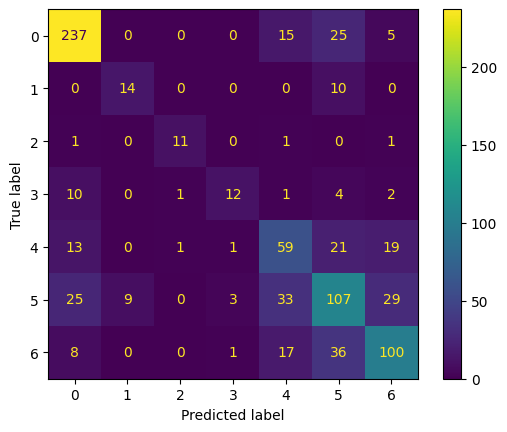


Hard cases for the model:

Label: boredom(1)
Hard cases of false negatives: ['neutral(5)']
Hard cases of false positives: ['neutral(5)']

Label: fear(3)
Hard cases of false negatives: ['anger(0)']

Label: happiness(4)
Hard cases of false positives: ['neutral(5)']

Label: sadness(6)
Hard cases of false negatives: ['neutral(5)']



In [38]:
svm_best_model = load_model('SVC', 'f1_macro', name_spec='final')
svm_emo_iemo = SVC().set_params(**svm_best_model.get_params())
svm_emo_iemo.fit(X_train, y_train)
model_eval(svm_emo_iemo, X_train, X_test, y_train, y_test, confusion=True)

### Random Forest


Evaluation: f1_score
98.36% for the train data
58.54% for the test data

Evaluation: accuracy_score
97.22% for the train data
64.90% for the test data

Evaluation: precision_score
98.07% for the train data
60.34% for the test data

Evaluation: recall_score
98.69% for the train data
61.82% for the test data

Evaluation: confusion_matrix of test predictions


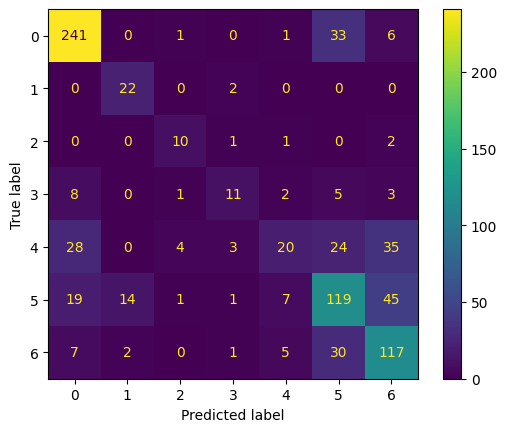


Hard cases for the model:

Label: boredom(1)
Hard cases of false positives: ['neutral(5)']

Label: disgust(2)
Hard cases of false positives: ['happiness(4)']

Label: fear(3)
Hard cases of false negatives: ['anger(0)']

Label: happiness(4)
Hard cases of false negatives: ['anger(0)', 'neutral(5)', 'sadness(6)']

Label: neutral(5)
Hard cases of false negatives: ['sadness(6)']

Label: sadness(6)
Hard cases of false positives: ['neutral(5)']



In [39]:
rfc_best_model = load_model('RandomForestClassifier', 'f1_macro', name_spec='final')
rfc_emo_iemo = RandomForestClassifier().set_params(**rfc_best_model.get_params())
rfc_emo_iemo.fit(X_train, y_train)
model_eval(rfc_emo_iemo, X_train, X_test, y_train, y_test, confusion=True)

### XGB


Evaluation: f1_score
94.95% for the train data
59.42% for the test data

Evaluation: accuracy_score
92.58% for the train data
65.02% for the test data

Evaluation: precision_score
95.61% for the train data
66.56% for the test data

Evaluation: recall_score
94.51% for the train data
55.89% for the test data

Evaluation: confusion_matrix of test predictions


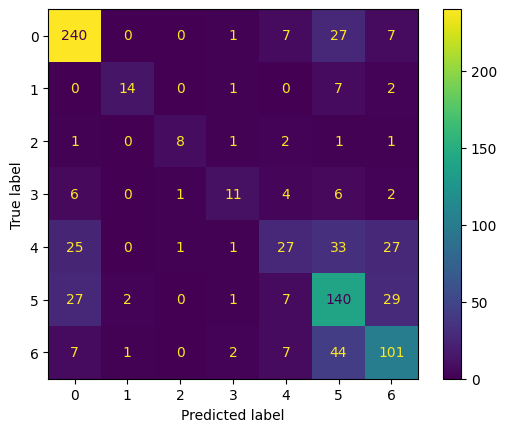


Hard cases for the model:

Label: boredom(1)
Hard cases of false negatives: ['neutral(5)']

Label: happiness(4)
Hard cases of false negatives: ['anger(0)', 'neutral(5)', 'sadness(6)']

Label: sadness(6)
Hard cases of false negatives: ['neutral(5)']



In [40]:
xgb_best_model = load_model('XGBClassifier', 'f1_macro', name_spec='final')
xgb_emo_iemo = XGBClassifier().set_params(**xgb_best_model.get_params())
xgb_emo_iemo.fit(X_train, y_train)
model_eval(xgb_emo_iemo, X_train, X_test, y_train, y_test, confusion=True)

# b) EmoDB + Iemocap own feature selection

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.9 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (2773, 594)
#### Single_Label Multi_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#############################################

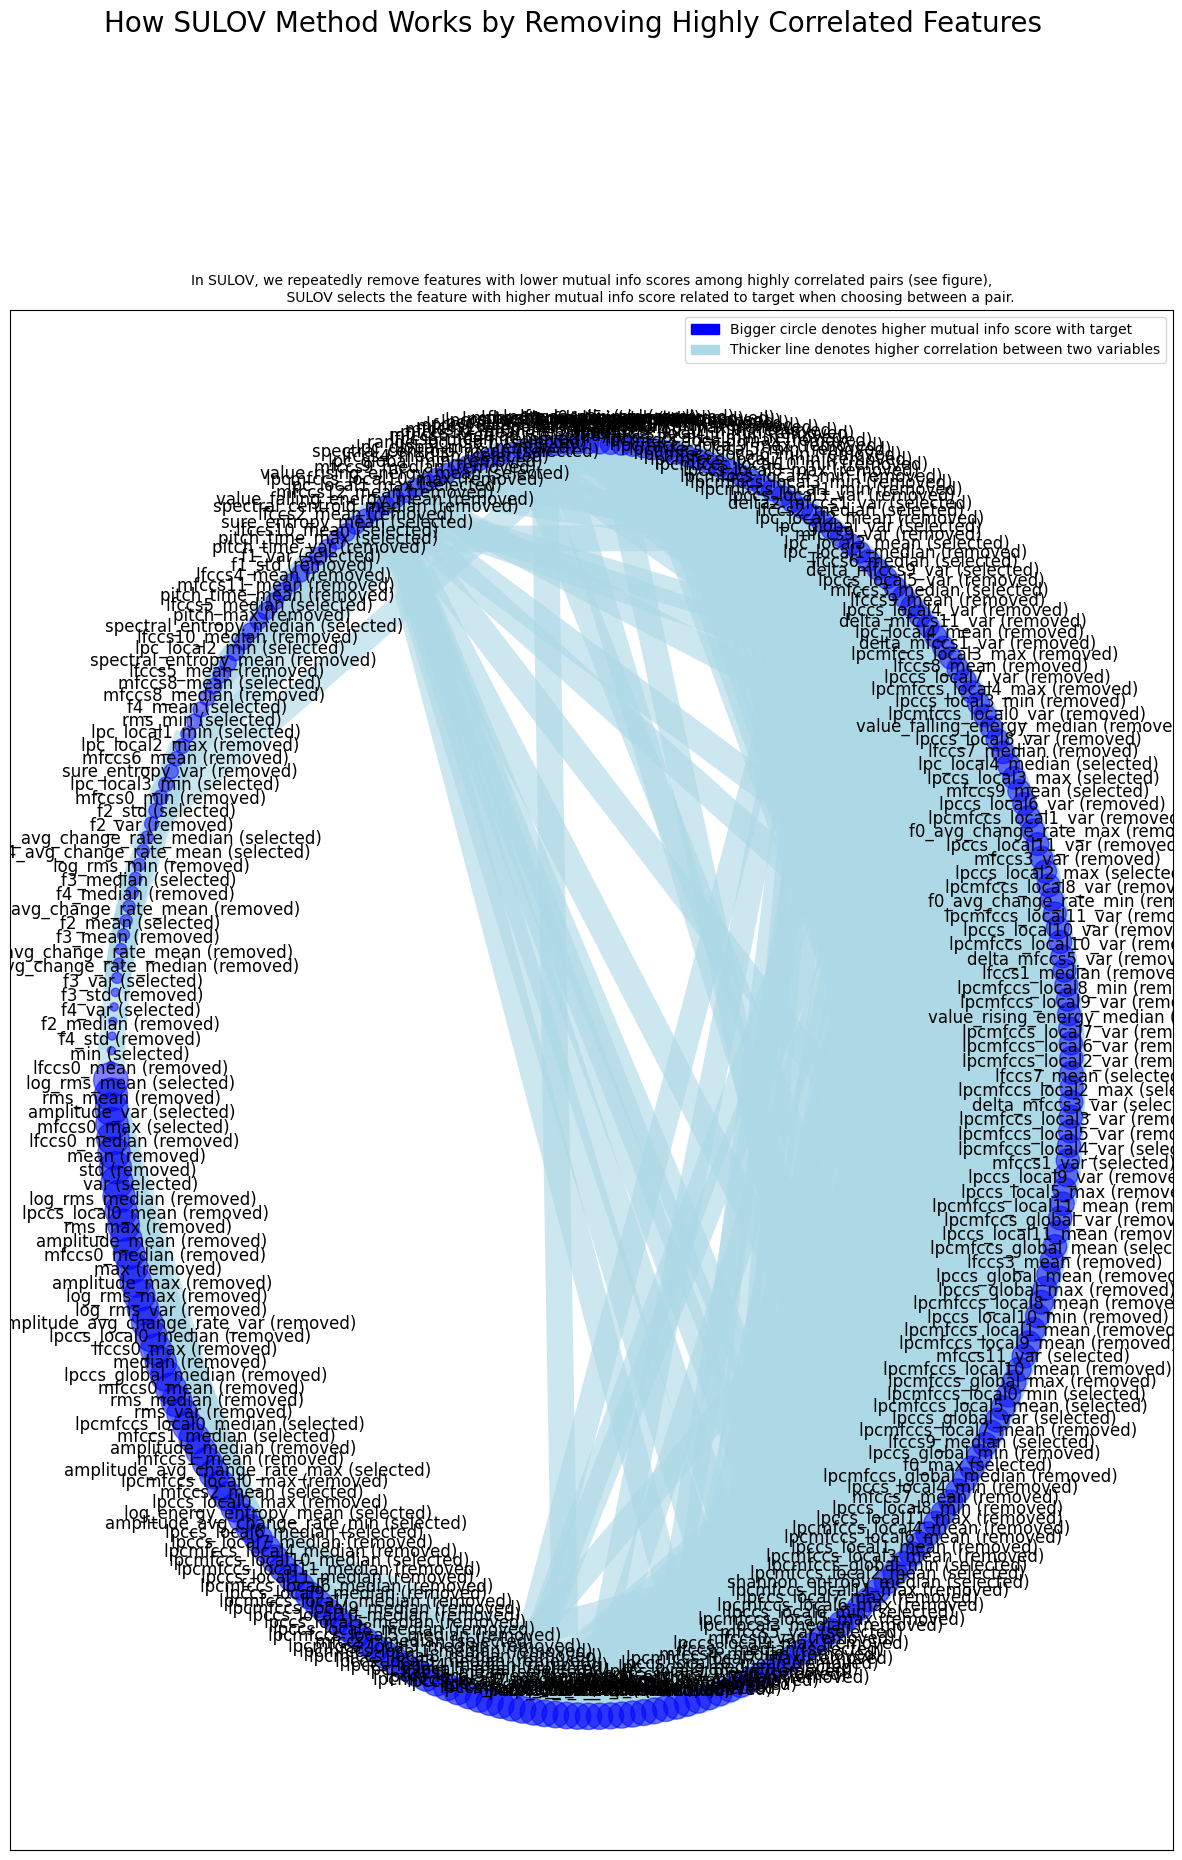

Time taken for SULOV method = 11 seconds
    Adding 0 categorical variables to reduced numeric variables  of 406
Finally 406 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 406 
    Taking top 88 features per iteration...
    XGBoost version using 1.7.5 as tree method: hist
Number of booster rounds = 100
        using 406 variables...
            selecting 143 features in this iteration
            Time taken for regular XGBoost feature selection = 23 seconds
        using 325 variables...
            selecting 126 features in this iteration
            Time taken for regular XGBoost feature selection = 1

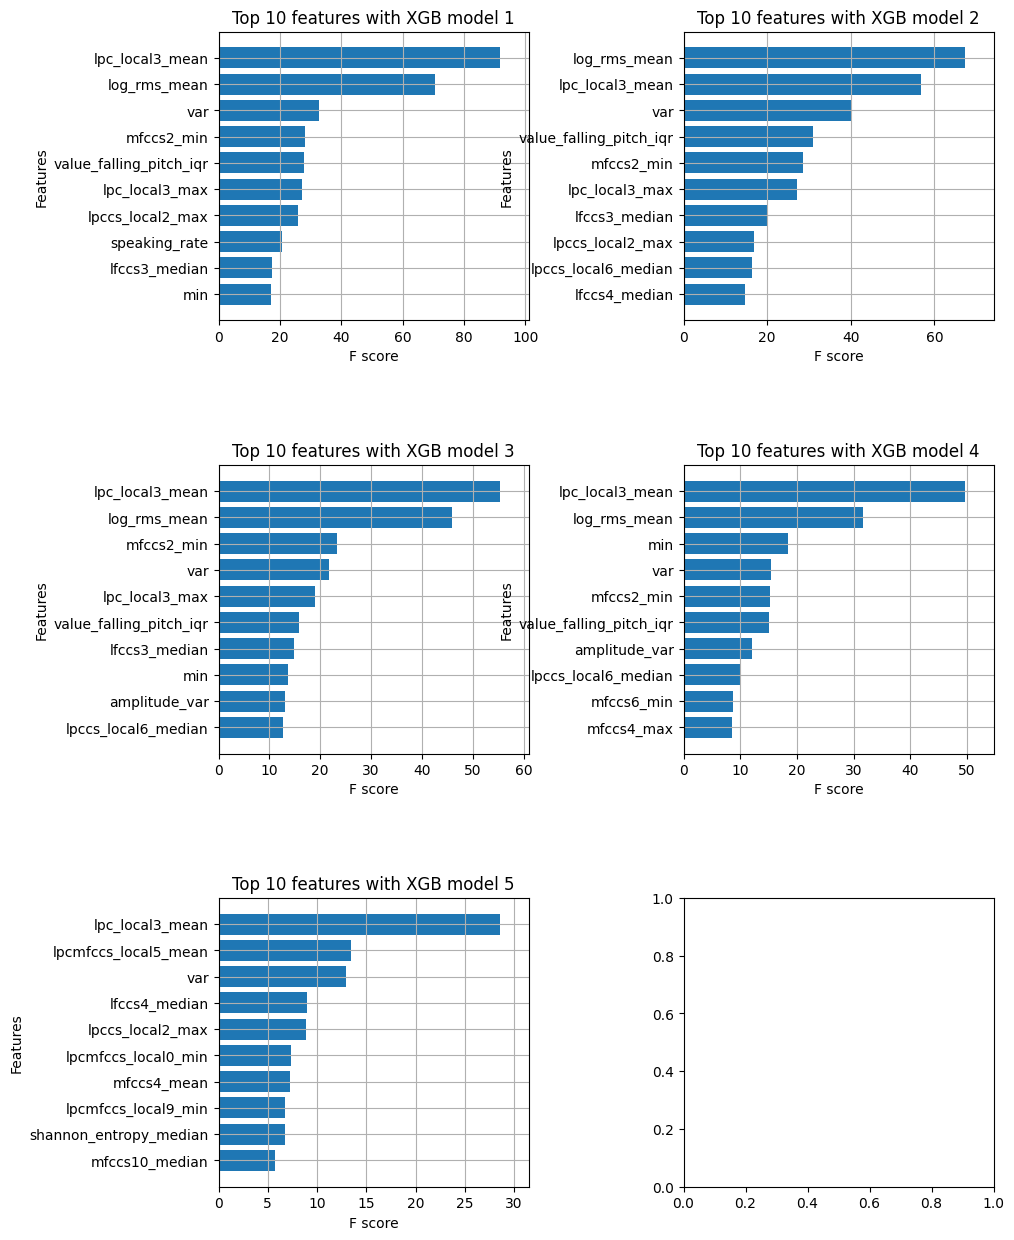

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 192 important features. Too many to print...
Total Time taken for featurewiz selection = 79 seconds
Output contains a list of 192 important features and a train dataframe


In [41]:
# automatic feature selection by using featurewiz package
selected_features_emo_iemo, df_emo_iemo_reduced = featurewiz(df_emo_iemo, 'label', corr_limit=0.9, verbose=2, sep=",", 
                                                           header=0,test_data="", feature_engg="", category_encoders="")

In [42]:
df_emo_iemo_reduced.to_pickle('../results/df_emo_iemo_reduced.pkl')

In [43]:
# load train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df_emo_iemo_reduced, test_size=0.3)

A snippet of the data:


lpc_local3_mean  log_rms_mean       var  mfccs2_min  \
128         -0.078703      1.046052  0.507418   -2.080224   
1972        -0.158857     -0.424704 -0.337342   -0.249602   
2678        -0.268756     -0.720500 -0.402916    0.107514   
1337        -0.334469     -0.508744 -0.379170    0.087339   
2625        -0.260099     -0.634924 -0.397903   -0.083814   

      value_falling_pitch_iqr  lpc_local3_max  lpccs_local2_max  \
128                  1.595951        0.344422         -1.227368   
1972                 0.728749        0.047790          1.086051   
2678                -0.543322        0.055176          0.793052   
1337                -0.253601       -0.184912          0.099543   
2625                -0.260052       -0.693524          0.751059   

      speaking_rate  lfccs3_median       min  lfccs4_median  \
128        1.634696      -3.235018 -1.036905       1.078541   
1972      -1.816005      -0.753824  0.437044       2.002904   
2678      -0.372635       0.102619  0.799012       0.985507   
1337      -1.147943       0.531513  0.684464       0.363729   
2625       1.075789       0.708749  0.782136      -0.448092   

      lpcmfccs_local0_median  amplitude_var  f0_median  lpccs_local6_median  \
128                 1.874579       2.577178   2.343576            -1.044714   
1972               -0.820671      -0.401703  -0.480490            -0.294278   
2678               -1.006843      -0.636733  -0.379579            -0.428508   
1337               -0.462145      -0.574891  -0.404441            -0.318095   
2625               -0.745758      -0.629010   0.834443            -0.196113   

      lpcmfccs_global_min  lfccs1_var  f2_avg_change_rate_max  mfccs4_max  \
128              0.331031    0.595408               -0.925207    0.042652   
1972            -0.253442   -0.374119               -1.730372   -0.678304   
2678             0.255901   -0.635794                1.596561   -0.176358   
1337            -0.286985   -0.303987               -1.385458    0.310148   
2625             0.308114    0.644627                0.538593   -0.622101   

      delta2_mfccs0_max   zcr_max  amplitude_avg_change_rate_max  \
128            2.337367  0.935236                       1.877393   
1972           0.736189 -1.584993                      -0.074998   
2678          -0.465281  0.424769                      -0.796474   
1337          -0.825559 -1.495100                      -0.792135   
2625          -0.481737  0.463295                      -0.741191   

      mfccs1_median  mfccs6_min  lpcmfccs_local9_min  delta_mfccs0_var  \
128       -3.405452   -1.247979            -0.222157          3.848348   
1972       0.529104   -2.345907             0.251698         -0.010743   
2678       0.585338   -0.415530            -0.220532         -0.921198   
1337       0.542047    2.175597             0.196616         -0.169375   
2625      -0.006975    0.201274            -0.221510         -0.609958   

      lfccs11_mean  shannon_entropy_median  duration_falling_energy_mean  \
128      -1.534413                0.682684                      0.948542   
1972     -0.596154               -1.603957                     -0.073768   
2678      0.409978               -1.215684                     -0.449046   
1337      0.421308                0.348403                     -1.070196   
2625     -0.380947                0.211730                     -0.066800   

      value_rising_pitch_median  lfccs1_max  mfccs4_min  lfccs2_var  \
128                    0.233999   -1.440141   -1.030268    0.895685   
1972                   0.993327    0.786652    0.301517    1.575528   
2678                  -0.199224    0.619012    0.100353   -0.680223   
1337                  -0.281567    0.549894   -0.129827   -0.173126   
2625                   0.241956    0.430029    0.208641   -1.035828   

      delta_mfccs4_var  mfccs4_var  lfccs1_min  duration  \
128           2.992097    1.692426   -1.593819 -0.730992   
1972         -0.367684   -0.093218    1.115574 -0.548767   
2

There are 1941 entries with 192 columns in the training data.
There are 832 entries with 192 columns in the testing data.


### SVM


Evaluation: f1_score
98.60% for the train data
67.21% for the test data

Evaluation: accuracy_score
97.73% for the train data
69.59% for the test data

Evaluation: precision_score
98.53% for the train data
72.23% for the test data

Evaluation: recall_score
98.68% for the train data
64.60% for the test data

Evaluation: confusion_matrix of test predictions


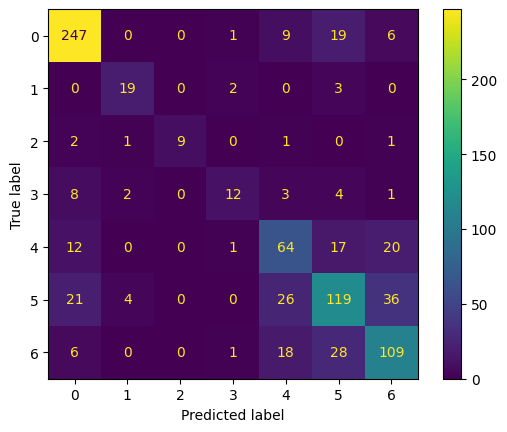


Hard cases for the model:

Label: fear(3)
Hard cases of false negatives: ['anger(0)']

Label: happiness(4)
Hard cases of false positives: ['neutral(5)']

Label: sadness(6)
Hard cases of false positives: ['neutral(5)']



In [44]:
svm_best_model = load_model('SVC', 'f1_macro', name_spec='final')
svm_emo_iemo_reduced = SVC().set_params(**svm_best_model.get_params())
svm_emo_iemo_reduced.fit(X_train, y_train)
model_eval(svm_emo_iemo_reduced, X_train, X_test, y_train, y_test, confusion=True)

### Random Forest


Evaluation: f1_score
98.16% for the train data
61.70% for the test data

Evaluation: accuracy_score
97.11% for the train data
65.87% for the test data

Evaluation: precision_score
97.77% for the train data
63.76% for the test data

Evaluation: recall_score
98.61% for the train data
63.18% for the test data

Evaluation: confusion_matrix of test predictions


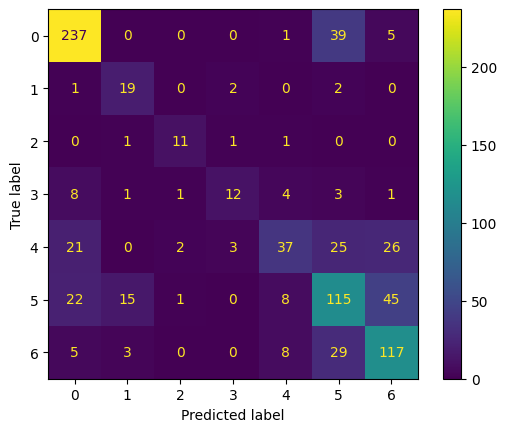


Hard cases for the model:

Label: boredom(1)
Hard cases of false positives: ['neutral(5)']

Label: fear(3)
Hard cases of false negatives: ['anger(0)']

Label: happiness(4)
Hard cases of false negatives: ['neutral(5)', 'sadness(6)']

Label: neutral(5)
Hard cases of false negatives: ['sadness(6)']

Label: sadness(6)
Hard cases of false positives: ['neutral(5)']



In [45]:
rfc_best_model = load_model('RandomForestClassifier', 'f1_macro', name_spec='final')
rfc_emo_iemo_reduced = RandomForestClassifier().set_params(**rfc_best_model.get_params())
rfc_emo_iemo_reduced.fit(X_train, y_train)
model_eval(rfc_emo_iemo_reduced, X_train, X_test, y_train, y_test, confusion=True)

### XGB


Evaluation: f1_score
96.00% for the train data
62.42% for the test data

Evaluation: accuracy_score
94.18% for the train data
67.31% for the test data

Evaluation: precision_score
96.55% for the train data
67.97% for the test data

Evaluation: recall_score
95.60% for the train data
59.53% for the test data

Evaluation: confusion_matrix of test predictions


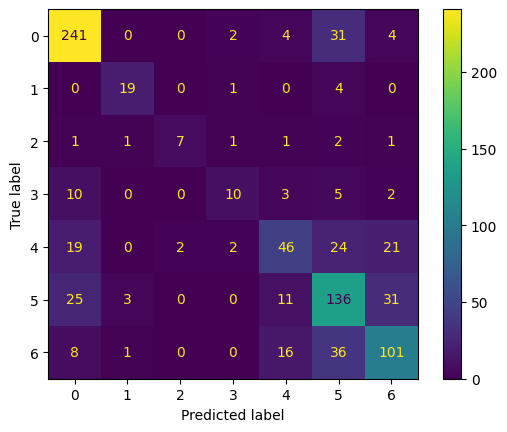


Hard cases for the model:

Label: disgust(2)
Hard cases of false positives: ['happiness(4)']

Label: fear(3)
Hard cases of false negatives: ['anger(0)']

Label: happiness(4)
Hard cases of false negatives: ['neutral(5)']

Label: sadness(6)
Hard cases of false negatives: ['neutral(5)']



In [46]:
xgb_best_model = load_model('XGBClassifier', 'f1_macro', name_spec='final')
xgb_emo_iemo_reduced = XGBClassifier().set_params(**xgb_best_model.get_params())
xgb_emo_iemo_reduced.fit(X_train, y_train)
model_eval(xgb_emo_iemo_reduced, X_train, X_test, y_train, y_test, confusion=True)

# 4) EmoDB + RAVDESS + IEMOCAP
## a) EmoDB + Ravdess + Iemocap with most important features from featurewiz 97

In [47]:
# get most important features (featurewiz 97)
df = pd.read_pickle('../results/df_prep_most_important97.pkl')
feat_most_imp97 = df.columns.to_list() 

# load data
df_emo_rav_iemo = pd.read_pickle('../results/df_prep_numerical_only_all_stats_emodb_ravdess_iemocap.pkl')

# check if there are any features in the saved set of most important features from emodb
mis_cols = list(set(feat_most_imp97) - set(df_emo_rav_iemo.columns.to_list()))
print(f'{mis_cols} are missing in the Iemocap/Ravdess feature set and are removed from the list.')
for feat in mis_cols:
    feat_most_imp97.remove(feat)
    
# select features    
df_emo_rav_iemo_most_imp97 = df_emo_rav_iemo[feat_most_imp97]

# load train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df_emo_rav_iemo_most_imp97, test_size=0.3)

['f0_avg_change_rate_median'] are missing in the Iemocap/Ravdess feature set and are removed from the list.
A snippet of the data:


rms_min  mfccs5_mean   zcr_max  duration_rising_pitch_max  \
3240 -0.099948    -0.979311  1.262751                  -1.138961   
546  -0.643464    -0.071618 -0.167671                   0.373555   
1903  0.468190     0.872950 -0.077594                   1.408435   
1574 -0.643789    -1.988810  0.365585                   0.353654   
3136 -0.046792    -0.219181 -0.131640                   3.119967   

      lpccs_local4_min  lfccs9_max       min  energy_median  lfccs0_median  \
3240          0.016163    0.070734  0.311413       0.511154       0.500579   
546           0.016163    1.756250  0.562220      -0.664089      -0.881446   
1903          0.016163   -0.139762  0.533063      -0.596592       0.125440   
1574          0.016163    1.260154  0.038029      -0.662554      -0.613271   
3136          0.016163    0.458978 -0.024216      -0.616539       0.275070   

      lpccs_global_median  lpc_global_mean  value_falling_energy_max  \
3240             0.029151        -0.225237                  0.135936   
546             -0.054492        -0.841747                  0.204471   
1903            -0.022367        -0.354008                  0.200588   
1574             0.759265        -0.565108                  0.204470   
3136             0.705972         0.766481                  0.204426   

      mfccs11_mean    f1_min  lpc_local3_var  lpccs_local0_var  lfccs9_median  \
3240     -0.323084 -0.454592       -0.022689         -0.540563       0.612144   
546      -1.660241 -1.355190       -0.022464          1.787418       0.496492   
1903      0.775175  0.565748       -0.022754         -0.728062       0.070186   
1574     -1.111778 -0.216745       -0.022197          2.006867      -0.136467   
3136      0.180729 -0.138253       -0.022733         -0.139270       0.296593   

      delta_mfccs0_min  value_falling_pitch_iqr  lpc_local1_mean  \
3240          0.861882                 0.997666        -0.413790   
546          -0.319327                -0.434506         0.810653   
1903          0.847008                -0.579589        -0.644648   
1574         -0.613244                -0.269764         0.599959   
3136         -0.109918                -0.293751        -0.432636   

      f1_avg_change_rate_var  threshold_entropy_var  mfccs3_max   f2_mean  \
3240               -0.634944              -0.702696    0.172054  0.653984   
546                 0.710518               1.237118    0.407414 -1.164742   
1903               -0.102266               0.106463   -0.495908 -2.035951   
1574               -0.400939               1.129254   -0.255822 -0.421786   
3136               -0.472406               0.277321    0.464401  0.653233   

      lfccs7_var  lfccs9_var  delta_mfccs5_median  mfccs4_max  energy_var  \
3240    0.899552    1.050186             0.160036   -0.410520   -0.397848   
546    -0.158405    0.007436            -0.044332    1.972706   -0.720235   
1903   -1.007872   -0.825769             0.261969    0.372013    0.361036   
1574    0.780163    0.016734            -0.044332    1.029358   -0.721212   
3136   -0.068091    0.584753             0.391385    0.009620   -1.181255   

      delta2_mfccs3_min  lpccs_local5_mean  shannon_entropy_mean  \
3240           0.045974          -0.016163              0.972729   
546            0.557817          -0.016163             -1.209773   
1903           0.588440          -0.016163              0.669812   
1574          -1.069671          -0.016163             -1.039115   
3136          -0.203300          -0.016163              0.290988   

      delta2_mfccs5_mean  delta_mfccs4_median   f3_mean  mfccs5_var  \
3240           -0.556007            -0.851522 -0.554399    0.703200   
546             0.025686            -0.153087 -0.974981    1.333206   
1903           -0.025100            -0.329547 -2.305957   -0.609110   
1574            0.028947            -0.153087 -0.017123    1.409186   
3136            0.278360             0.599460  0.459034   -0.018263   

      voiced_var  duration_rising_ener

There are 2680 entries with 96 columns in the training data.
There are 1149 entries with 96 columns in the testing data.


### SVM


Evaluation: f1_score
97.94% for the train data
62.93% for the test data

Evaluation: accuracy_score
97.46% for the train data
63.71% for the test data

Evaluation: precision_score
97.54% for the train data
63.69% for the test data

Evaluation: recall_score
98.37% for the train data
62.37% for the test data

Evaluation: confusion_matrix of test predictions


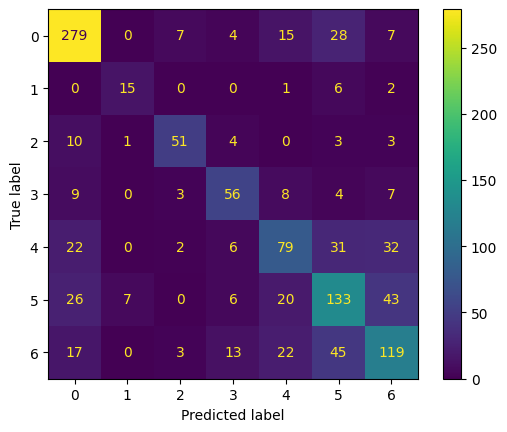


Hard cases for the model:

Label: boredom(1)
Hard cases of false negatives: ['neutral(5)']
Hard cases of false positives: ['neutral(5)']

Label: sadness(6)
Hard cases of false negatives: ['neutral(5)']
Hard cases of false positives: ['neutral(5)']



In [48]:
svm_best_model = load_model('SVC', 'f1_macro', name_spec='final')
svm_emo_rav_iemo = SVC().set_params(**svm_best_model.get_params())
svm_emo_rav_iemo.fit(X_train, y_train)
model_eval(svm_emo_rav_iemo, X_train, X_test, y_train, y_test, confusion=True)

### Random Forest


Evaluation: f1_score
94.62% for the train data
57.96% for the test data

Evaluation: accuracy_score
95.30% for the train data
60.05% for the test data

Evaluation: precision_score
92.69% for the train data
58.38% for the test data

Evaluation: recall_score
97.21% for the train data
62.85% for the test data

Evaluation: confusion_matrix of test predictions


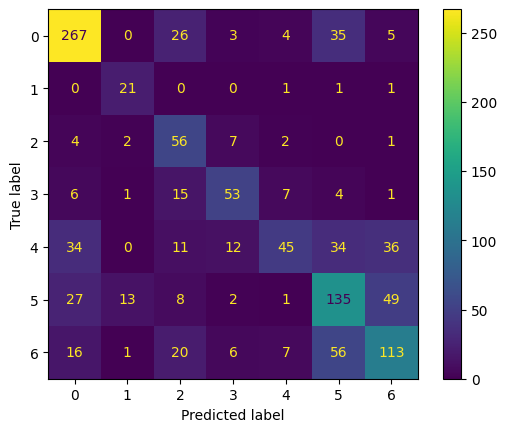


Hard cases for the model:

Label: boredom(1)
Hard cases of false positives: ['neutral(5)']

Label: happiness(4)
Hard cases of false negatives: ['sadness(6)']

Label: neutral(5)
Hard cases of false negatives: ['sadness(6)']
Hard cases of false positives: ['sadness(6)']

Label: sadness(6)
Hard cases of false negatives: ['neutral(5)']
Hard cases of false positives: ['neutral(5)']



In [49]:
rfc_best_model = load_model('RandomForestClassifier', 'f1_macro', name_spec='final')
rfc_emo_rav_iemo = RandomForestClassifier().set_params(**rfc_best_model.get_params())
rfc_emo_rav_iemo.fit(X_train, y_train)
model_eval(rfc_emo_rav_iemo, X_train, X_test, y_train, y_test, confusion=True)

### XGB


Evaluation: f1_score
90.73% for the train data
58.55% for the test data

Evaluation: accuracy_score
88.51% for the train data
59.88% for the test data

Evaluation: precision_score
91.53% for the train data
61.53% for the test data

Evaluation: recall_score
90.40% for the train data
56.94% for the test data

Evaluation: confusion_matrix of test predictions


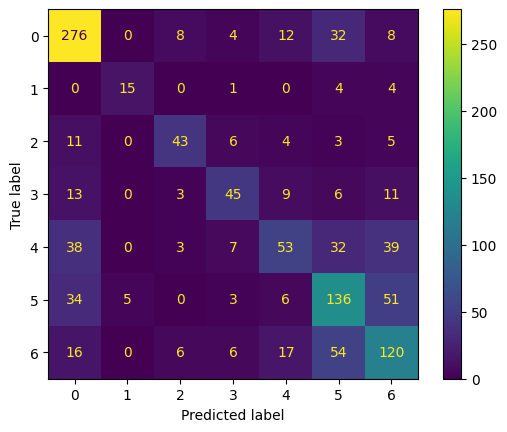


Hard cases for the model:

Label: boredom(1)
Hard cases of false positives: ['neutral(5)']

Label: happiness(4)
Hard cases of false negatives: ['anger(0)', 'sadness(6)']

Label: neutral(5)
Hard cases of false negatives: ['sadness(6)']
Hard cases of false positives: ['sadness(6)']

Label: sadness(6)
Hard cases of false negatives: ['neutral(5)']
Hard cases of false positives: ['neutral(5)']



In [50]:
xgb_best_model = load_model('XGBClassifier', 'f1_macro', name_spec='final')
xgb_emo_rav_iemo = XGBClassifier().set_params(**xgb_best_model.get_params())
xgb_emo_rav_iemo.fit(X_train, y_train)
model_eval(xgb_emo_rav_iemo, X_train, X_test, y_train, y_test, confusion=True)

## b) EmoDB + Ravdess + Iemocap own feature selection

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.9 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Multi_Classification problem ####
    Loaded train data. Shape = (3829, 576)
#### Single_Label Multi_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#############################################

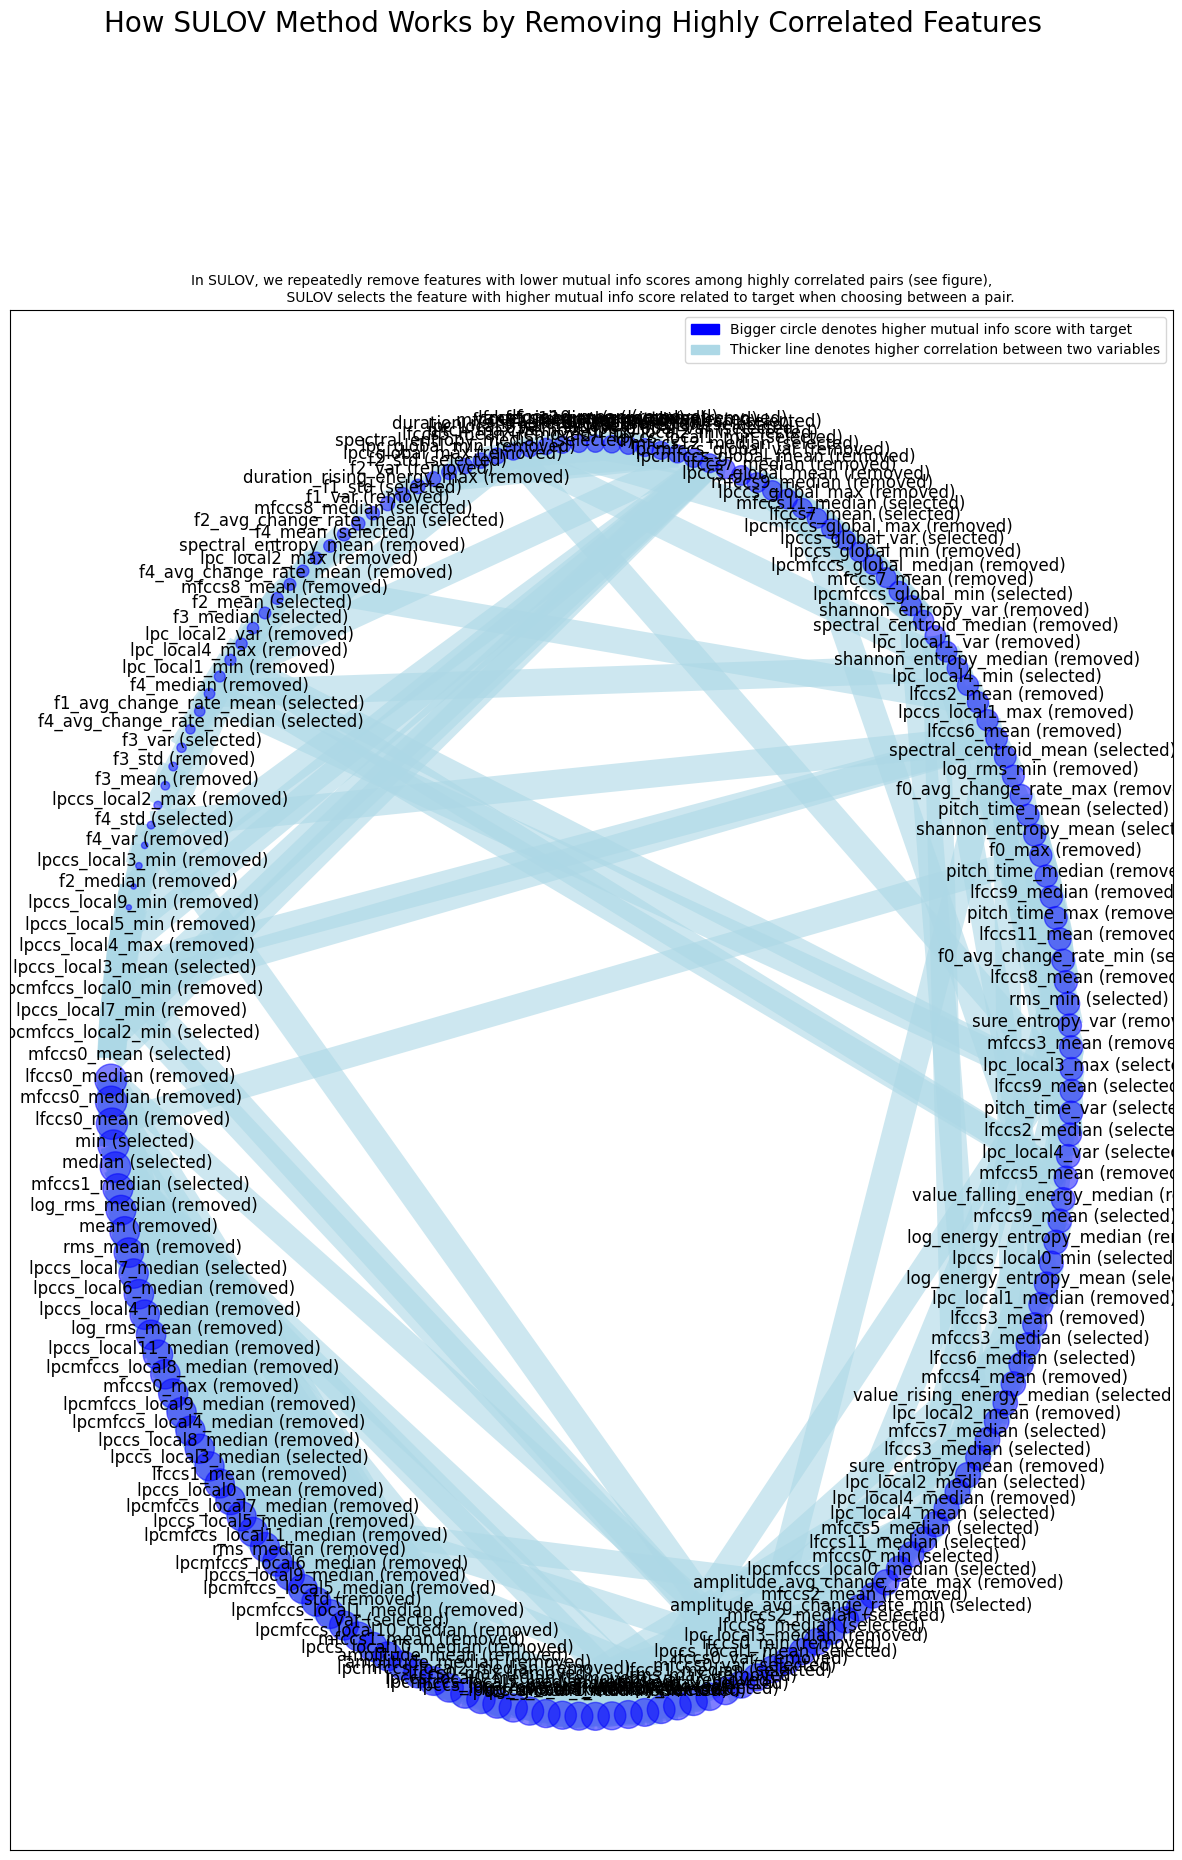

Time taken for SULOV method = 8 seconds
    Adding 0 categorical variables to reduced numeric variables  of 461
Finally 461 vars selected after SULOV
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 461 
    Taking top 86 features per iteration...
    XGBoost version using 1.7.5 as tree method: hist
Number of booster rounds = 100
        using 461 variables...
            selecting 140 features in this iteration
            Time taken for regular XGBoost feature selection = 27 seconds
        using 369 variables...
            selecting 117 features in this iteration
            Time taken for regular XGBoost feature selection = 21

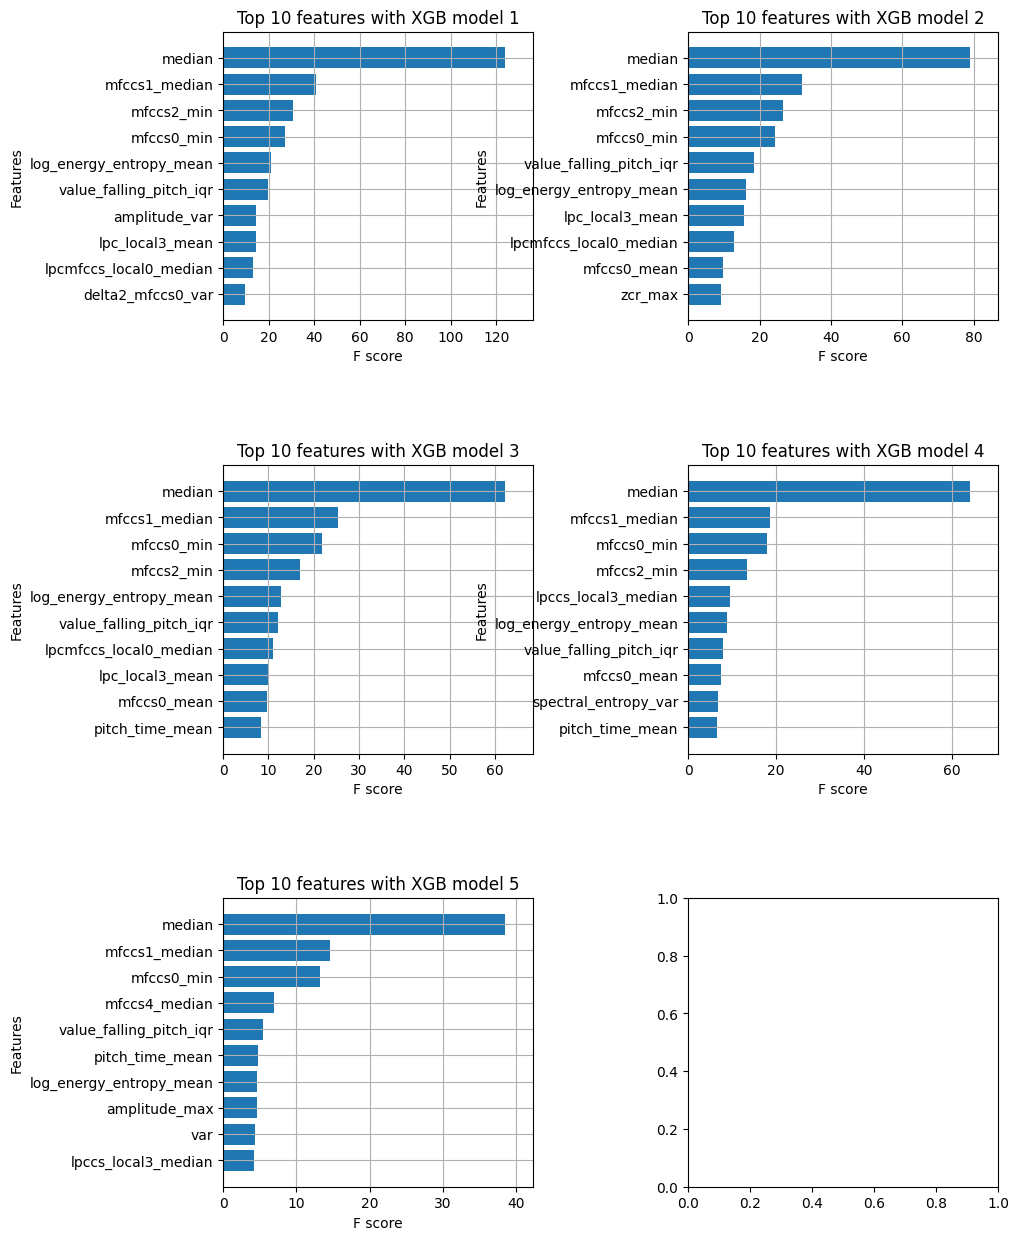

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 186 important features. Too many to print...
Total Time taken for featurewiz selection = 90 seconds
Output contains a list of 186 important features and a train dataframe


In [51]:
# automatic feature selection by using featurewiz package
selected_features_emo_rav_iemo, df_emo_rav_iemo_reduced = featurewiz(df_emo_rav_iemo, 'label', corr_limit=0.9, verbose=2, sep=",", 
                                                           header=0,test_data="", feature_engg="", category_encoders="")

In [52]:
df_emo_rav_iemo_reduced.to_pickle('../results/df_emo_rav_iemo_reduced.pkl')

In [53]:
# load train/test data
X_train, X_test, y_train, y_test = load_train_test_data(df_emo_rav_iemo_reduced, test_size=0.3)

A snippet of the data:


median  mfccs1_median  mfccs2_min  mfccs0_min  \
3240 -0.146900       0.157674   -0.171137    0.399253   
546  -0.525081      -1.105499    0.419012   -1.199446   
1903 -0.344827       0.986211    0.785878    0.848711   
1574 -0.516245      -1.648654   -2.040491   -0.602876   
3136 -0.385472       0.374680   -1.564781    0.297336   

      log_energy_entropy_mean  value_falling_pitch_iqr  amplitude_var  \
3240                 0.634657                 0.997666      -0.482163   
546                  0.837730                -0.434506      -0.513898   
1903                -0.777344                -0.579589      -0.503063   
1574                 0.698704                -0.269764      -0.317213   
3136                -0.533262                -0.293751      -0.301215   

      lpc_local3_mean  lpcmfccs_local0_median  delta2_mfccs0_var  \
3240        -0.398650                0.543687          -0.030906   
546          0.446353               -0.897526          -0.458686   
1903        -0.491892                0.085051          -0.785834   
1574         0.426694               -0.347784          -0.321216   
3136        -0.472431               -0.170888          -0.037308   

      threshold_entropy_var   zcr_max  spectral_entropy_var  \
3240              -0.702696  1.262751             -0.418856   
546                1.237118 -0.167671              1.397970   
1903               0.106463 -0.077594             -0.657405   
1574               1.129254  0.365585              1.760678   
3136               0.277321 -0.131640             -0.478910   

      delta2_mfccs0_median  duration_rising_pitch_max  mfccs0_mean  \
3240             -0.323716                  -1.138961     0.398855   
546               0.161289                   0.373555    -0.941578   
1903              0.437926                   1.408435     0.238684   
1574              0.161289                   0.353654    -0.615355   
3136              0.356724                   3.119967     0.291347   

      lfccs1_median  duration  lpccs_local7_median  speaking_rate  \
3240       0.611909 -0.419596            -0.224282       0.727850   
546       -0.318817 -0.060440             0.672349      -0.302685   
1903       0.603900  1.165244            -0.284094      -0.076901   
1574      -1.508632  0.382342             0.776613      -0.651104   
3136       0.047139  2.124466            -0.032310      -0.641826   

      lpccs_local3_median  lpccs_global_median  duration_falling_pitch_iqr  \
3240            -0.593836             0.029151                   -0.158387   
546              0.622388            -0.054492                   -0.740617   
1903            -0.633951            -0.022367                   -0.376724   
1574             1.167718             0.759265                   -0.231166   
3136            -0.411668             0.705972                   -0.413113   

      amplitude_avg_change_rate_var  lfccs4_var  mfccs10_median  mfccs1_var  \
3240                      -0.430667    0.547167       -2.302514   -0.241880   
546                       -0.473935    1.793998       -0.238391    2.086102   
1903                      -0.454097   -1.163805        0.477602   -0.522680   
1574                      -0.437900    0.999923        0.615926    1.387615   
3136                      -0.328276    0.575393       -0.011462   -0.858360   

      mfccs2_max  lfccs1_min  mfccs3_median  pitch_time_var   f0_mean  \
3240    0.357381   -0.044135       0.901440       -0.326060  1.634057   
546     0.618846   -0.419288      -1.489626       -0.182969 -0.620905   
1903   -0.001718    0.790196       0.659595        0.610767 -0.679251   
1574    0.201010   -0.419287      -1.656189        0.049915 -0.057490   
3136   -0.456095    0.446074       0.243139        1.550213  0.172673   

      lfccs11_median  lpc_global_var  articulation_rate  \
3240       -2.380545        0.103827           0.653447   
546        -0.692593        1.270863           1.046755   
1903        0.629855       -0.108262      

There are 2680 entries with 186 columns in the training data.
There are 1149 entries with 186 columns in the testing data.


### SVM


Evaluation: f1_score
98.41% for the train data
70.12% for the test data

Evaluation: accuracy_score
97.76% for the train data
69.19% for the test data

Evaluation: precision_score
98.27% for the train data
70.15% for the test data

Evaluation: recall_score
98.57% for the train data
70.18% for the test data

Evaluation: confusion_matrix of test predictions


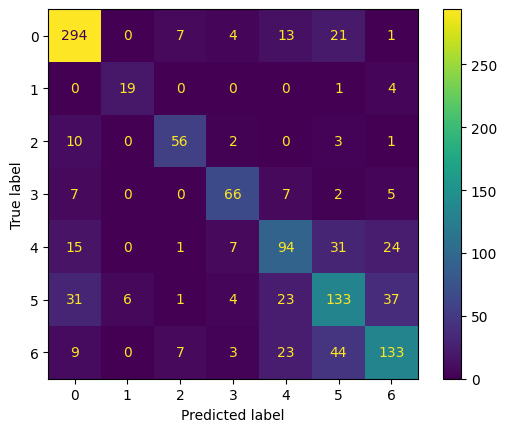


Hard cases for the model:

Label: boredom(1)
Hard cases of false positives: ['neutral(5)']

Label: sadness(6)
Hard cases of false negatives: ['neutral(5)']



In [54]:
svm_best_model = load_model('SVC', 'f1_macro', name_spec='final')
svm_emo_rav_iemo_reduced = SVC().set_params(**svm_best_model.get_params())
svm_emo_rav_iemo_reduced.fit(X_train, y_train)
model_eval(svm_emo_rav_iemo_reduced, X_train, X_test, y_train, y_test, confusion=True)

### Random Forest


Evaluation: f1_score
94.63% for the train data
61.48% for the test data

Evaluation: accuracy_score
95.07% for the train data
62.14% for the test data

Evaluation: precision_score
92.79% for the train data
60.63% for the test data

Evaluation: recall_score
97.12% for the train data
67.53% for the test data

Evaluation: confusion_matrix of test predictions


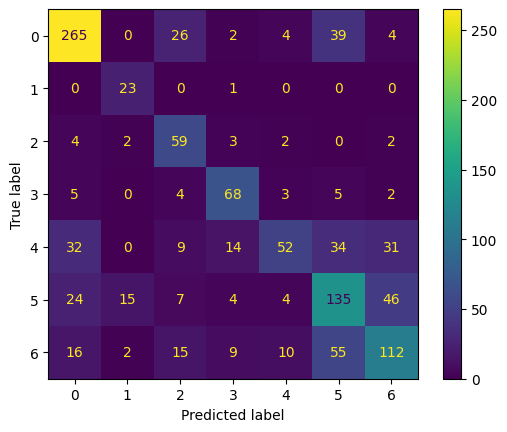


Hard cases for the model:

Label: boredom(1)
Hard cases of false positives: ['neutral(5)']

Label: disgust(2)
Hard cases of false positives: ['anger(0)']

Label: neutral(5)
Hard cases of false positives: ['sadness(6)']

Label: sadness(6)
Hard cases of false negatives: ['neutral(5)']
Hard cases of false positives: ['neutral(5)']



In [55]:
rfc_best_model = load_model('RandomForestClassifier', 'f1_macro', name_spec='final')
rfc_emo_rav_iemo_reduced = RandomForestClassifier().set_params(**rfc_best_model.get_params())
rfc_emo_rav_iemo_reduced.fit(X_train, y_train)
model_eval(rfc_emo_rav_iemo_reduced, X_train, X_test, y_train, y_test, confusion=True)

### XGB


Evaluation: f1_score
92.87% for the train data
62.82% for the test data

Evaluation: accuracy_score
90.90% for the train data
65.01% for the test data

Evaluation: precision_score
93.61% for the train data
66.06% for the test data

Evaluation: recall_score
92.40% for the train data
61.05% for the test data

Evaluation: confusion_matrix of test predictions


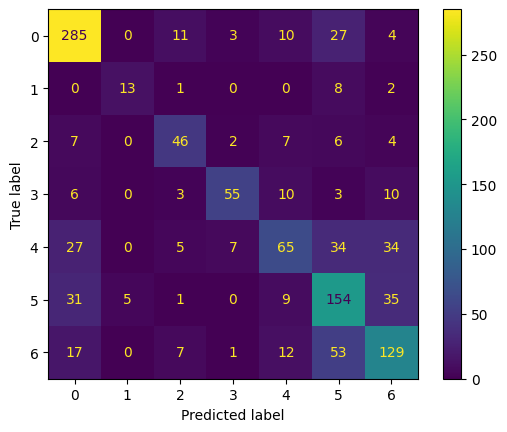


Hard cases for the model:

Label: boredom(1)
Hard cases of false negatives: ['neutral(5)']
Hard cases of false positives: ['neutral(5)']

Label: sadness(6)
Hard cases of false negatives: ['neutral(5)']



In [56]:
xgb_best_model = load_model('XGBClassifier', 'f1_macro', name_spec='final')
xgb_emo_rav_iemo_reducedd = XGBClassifier().set_params(**xgb_best_model.get_params())
xgb_emo_rav_iemo_reducedd.fit(X_train, y_train)
model_eval(xgb_emo_rav_iemo_reducedd, X_train, X_test, y_train, y_test, confusion=True)